In [2]:
library(foreign) ; library(tsModel) ; library(lmtest) ; library(Epi)
library(splines) ; library(grid); library(vcd)
library (dplyr) ; library (xtable)
library(sandwich) ; library(lmtest)

alldata <- read.csv("dataverse/2001_Table1ALL.csv")
alldata$Rate <- alldata$Deaths/alldata$StdPop

MEAN MONTHLY COUNTS -- UNADJUSTED AND PER 100,000 POPULATION

In [3]:
### HOMICIDES ###

# Subset Data
allhom <-subset(alldata, Cause=="AllHomicide")
FloridaHomOrig <- subset(allhom, Treatment ==1 & OrigData ==1)
ControlHomOrig <- subset(allhom, Treatment ==0 & OrigData ==1)

# Mean Monthly Counts - Original
mean(FloridaHomOrig$Deaths[FloridaHomOrig$Effective==0]) ##Florida before
mean(FloridaHomOrig$Deaths[FloridaHomOrig$Effective==1]) ##Florida after
mean(ControlHomOrig$Deaths[ControlHomOrig$Effective==0]) ##Control States before
mean(ControlHomOrig$Deaths[ControlHomOrig$Effective==1]) ##Control States after

# Mean Rate Counts 
mean(FloridaHomOrig$Rate[FloridaHomOrig$Effective==0]) #Florida Before
mean(FloridaHomOrig$Rate[FloridaHomOrig$Effective==1]) #Florida After
mean(ControlHomOrig$Rate[ControlHomOrig$Effective==0]) ##Control States before
mean(ControlHomOrig$Rate[ControlHomOrig$Effective==1]) ##Control States after

[1] 81.92593

[1] 99.22523

[1] 189.4125

[1] 182.7387

[1] 0.4913166

[1] 0.5255033

[1] 0.4090924

[1] 0.3831084

In [4]:
### FIREARM HOMICIDE ###

# Subset Data
firehom <- subset(alldata, Cause=="FirearmHomicide")
FFireHomOrig <- subset(firehom, Treatment ==1 & OrigData ==1)
CSFireHomOrig <- subset(firehom, Treatment ==0 & OrigData ==1)

# Mean Monthly Counts
mean(FFireHomOrig$Deaths[FFireHomOrig$Effective==0]) ##Florida before
mean(FFireHomOrig$Deaths[FFireHomOrig$Effective==1]) ##Florida after
mean(CSFireHomOrig$Deaths[CSFireHomOrig$Effective==0]) ##Control States before
mean(CSFireHomOrig$Deaths[CSFireHomOrig$Effective==1]) ##Control States after

# Mean Rate Counts
mean(FFireHomOrig$Rate[FFireHomOrig$Effective==0]) #Florida Before
mean(FFireHomOrig$Rate[FFireHomOrig$Effective==1]) # Florida After
mean(CSFireHomOrig$Rate[CSFireHomOrig$Effective==0]) ##Control States before
mean(CSFireHomOrig$Rate[CSFireHomOrig$Effective==1]) ##Control States after

[1] 49.06173

[1] 69.2973

[1] 116.3333

[1] 119.1351

[1] 0.2935571

[1] 0.3668142

[1] 0.2512053

[1] 0.2497485

In [5]:
### SUICIDES ###

# Subset Data
allsuicides <- subset(alldata, Cause=="Suicide")
Florida.SuiOrig <- subset(allsuicides, Treatment ==1 & OrigData ==1)
CS.SuiOrig <- subset(allsuicides, Treatment ==0 & OrigData ==1)

# Mean Monthly Counts - All Suicide
mean(Florida.SuiOrig$Deaths[Florida.SuiOrig$Effective==0]) ##Florida before
mean(Florida.SuiOrig$Deaths[Florida.SuiOrig$Effective==1]) ##Florida after
mean(CS.SuiOrig$Deaths[CS.SuiOrig$Effective==0]) ##Control States before
mean(CS.SuiOrig$Deaths[CS.SuiOrig$Effective==1]) ##Control States after

# Mean Rate Counts - All Suicide
mean(Florida.SuiOrig$Rate[Florida.SuiOrig$Effective==0]) #Florida Before
mean(Florida.SuiOrig$Rate[Florida.SuiOrig$Effective==1]) # Florida After
mean(CS.SuiOrig$Rate[CS.SuiOrig$Effective==0]) ##Control States before
mean(CS.SuiOrig$Rate[CS.SuiOrig$Effective==1]) ##Control States after

[1] 188.2593

[1] 232.5225

[1] 314.1852

[1] 382.2072

[1] 1.127432

[1] 1.228093

[1] 0.6786307

[1] 0.7998856

In [6]:
### FIREARM SUICIDES ###

# Subset Data
FASuic <- subset(alldata, Cause=="FirearmSuicide")
FFASuicOrig <- subset(FASuic, Treatment ==1 & OrigData ==1)
CSFASuicOrig <- subset(FASuic, Treatment ==0 & OrigData ==1)

# Mean Monthly Counts - Firearm Suicide
mean(FFASuicOrig$Deaths[FFASuicOrig$Effective==0]) ##Florida before
mean(FFASuicOrig$Deaths[FFASuicOrig$Effective==1]) ##Florida after
mean(CSFASuicOrig$Deaths[CSFASuicOrig$Effective==0]) ##Control States before
mean(CSFASuicOrig$Deaths[CSFASuicOrig$Effective==1]) ##Control States after

# Mean Rate Counts - Firearm Suicide
mean(FFASuicOrig$Rate[FFASuicOrig$Effective==0]) #Florida Before
mean(FFASuicOrig$Rate[FFASuicOrig$Effective==1]) # Florida After
mean(CSFASuicOrig$Rate[CSFASuicOrig$Effective==0]) ##Control States before
mean(CSFASuicOrig$Rate[CSFASuicOrig$Effective==1]) ##Control States after

[1] 99.32099

[1] 119.4505

[1] 129.3086

[1] 143.1892

[1] 0.595776

[1] 0.6307007

[1] 0.3424477

[1] 0.3673923

TESTS FOR SERIAL AUTOCORRELATION

In [7]:
# Homicide
BGtesthomF<- glm(Deaths ~ offset(log(StdPop)) + Effective + Time + harmonic(MonthNo,2,12), 
                 family=quasipoisson, FloridaHomOrig) 
bgtest(BGtesthomF)
bgtest(BGtesthomF, order=12)
##Result - Florida no
BGtesthomCS<- glm(Deaths ~ offset(log(StdPop)) + Effective + Time + harmonic(MonthNo,2,12), 
                  family=quasipoisson, ControlHomOrig) 
bgtest(BGtesthomCS)
bgtest(BGtesthomCS, order=12)
##Result - CS yes


# Homicide by Firearm
BGtestfirehomF<- glm(Deaths ~ offset(log(StdPop)) + Effective + Time + harmonic(MonthNo,2,12), 
                     family=quasipoisson, FFireHomOrig) 
bgtest(BGtestfirehomF)
BGtestfirehomCS<- glm(Deaths ~ offset(log(StdPop)) + Effective + Time + harmonic(MonthNo,2,12), 
                      family=quasipoisson, CSFireHomOrig) 
bgtest(BGtestfirehomCS)
##Result - CS and florida yes


# Suicide
BGtestsuicideF<- glm(Deaths ~ offset(log(StdPop)) + Effective + Time + harmonic(MonthNo,2,12), 
                     family=quasipoisson, Florida.SuiOrig) 
bgtest(BGtestsuicideF)
bgtest(BGtestsuicideF, order=12)
BGtestsuicideCS<- glm(Deaths ~ offset(log(StdPop)) + Effective + Time + harmonic(MonthNo,2,12), 
                      family=quasipoisson, CS.SuiOrig) 
bgtest(BGtestsuicideCS)
bgtest(BGtestsuicideCS, order=12)
##Result - CS and florida yes


## Suicide by Firearm
# Test for autocorrelation for Firearm Suicide
BGtestFsuicideF<- glm(Deaths ~ offset(log(StdPop)) + Effective + Time, 
                      family=quasipoisson, FFASuicOrig) 
bgtest(BGtestFsuicideF, order=12)

BGtestFsuicideCS<- glm(Deaths ~ offset(log(StdPop)) + Effective + Time + harmonic(MonthNo,2,12), 
                       family=quasipoisson, CSFASuicOrig) 
bgtest(BGtestFsuicideCS, order=12)


	Breusch-Godfrey test for serial correlation of order up to 1

data:  BGtesthomF
LM test = 0.18525, df = 1, p-value = 0.6669



	Breusch-Godfrey test for serial correlation of order up to 12

data:  BGtesthomF
LM test = 14.254, df = 12, p-value = 0.2848



	Breusch-Godfrey test for serial correlation of order up to 1

data:  BGtesthomCS
LM test = 11.88, df = 1, p-value = 0.0005674



	Breusch-Godfrey test for serial correlation of order up to 12

data:  BGtesthomCS
LM test = 35.725, df = 12, p-value = 0.0003586



	Breusch-Godfrey test for serial correlation of order up to 1

data:  BGtestfirehomF
LM test = 4.0692, df = 1, p-value = 0.04367



	Breusch-Godfrey test for serial correlation of order up to 1

data:  BGtestfirehomCS
LM test = 9.0503, df = 1, p-value = 0.002627



	Breusch-Godfrey test for serial correlation of order up to 1

data:  BGtestsuicideF
LM test = 1.9761, df = 1, p-value = 0.1598



	Breusch-Godfrey test for serial correlation of order up to 12

data:  BGtestsuicideF
LM test = 26.394, df = 12, p-value = 0.009436



	Breusch-Godfrey test for serial correlation of order up to 1

data:  BGtestsuicideCS
LM test = 4.7704, df = 1, p-value = 0.02895



	Breusch-Godfrey test for serial correlation of order up to 12

data:  BGtestsuicideCS
LM test = 44.426, df = 12, p-value = 1.292e-05



	Breusch-Godfrey test for serial correlation of order up to 12

data:  BGtestFsuicideF
LM test = 20.567, df = 12, p-value = 0.05709



	Breusch-Godfrey test for serial correlation of order up to 12

data:  BGtestFsuicideCS
LM test = 24.525, df = 12, p-value = 0.01724


In [8]:
Rep.Florida.Homicide <- rep(NA)
for (dataset in c("FloridaHomOrig")){
  if (dataset == "FloridaHomOrig"){
    temp.data <- FloridaHomOrig
  }
  Test<- glm(Deaths ~ offset(log(StdPop)) + Effective + Time + harmonic(MonthNo,2,12), 
             family=quasipoisson, temp.data) 
  
  stepchangeestimate <- exp(ci.lin(Test, subset="Effective")[,"Estimate"])
  stepchangebottomCI <- exp(ci.lin(Test, subset="Effective")[,"2.5%"])
  stepchangetopCI <- exp(ci.lin(Test, subset="Effective")[,"97.5%"])
  stepchangep <- summary(Test)$coefficients["Effective",4]
  Step.Changeall <- rbind(stepchangebottomCI, stepchangeestimate, stepchangetopCI, stepchangep)
  trendestimate <- exp(ci.lin(Test, subset="Time")[,"Estimate"])
  trendbottomCI <- exp(ci.lin(Test, subset="Time")[,"2.5%"])
  trendtopCI <- exp(ci.lin(Test, subset="Time")[,"97.5%"])
  trendpval <- summary(Test)$coefficients["Time",4]
  trendall <- rbind(trendbottomCI, trendestimate, trendtopCI, trendpval)
  dta <- data.frame(Step.Changeall, trendall, type = dataset)
  Rep.Florida.Homicide <- cbind(Rep.Florida.Homicide, dta)
  rownames(Rep.Florida.Homicide) = c("Bottom CI","Estimate", "Top CI", "P Value")
}
Rep.Florida.Homicide

## FOR LOOP FOR EVERYTHING WITH ROBUST SE
Table1ModelsRSE <- NA
for (dataset in c("ControlHomOrig", "FFireHomOrig","CSFireHomOrig","Florida.SuiOrig","CS.SuiOrig","FFASuicOrig","CSFASuicOrig")){
  if (dataset == "ControlHomOrig"){
    temp.data <- ControlHomOrig
  }
  else if (dataset == "FFireHomOrig"){
    temp.data <- FFireHomOrig
  }
  else if (dataset == "CSFireHomOrig"){
    temp.data <- CSFireHomOrig
  }
  else if (dataset == "Florida.SuiOrig"){
    temp.data <- Florida.SuiOrig
  }
  else if (dataset == "CS.SuiOrig"){
    temp.data <- CS.SuiOrig
  }
  else if (dataset == "FFASuicOrig"){
    temp.data <- FFASuicOrig
  } 
  else if (dataset == "CSFASuicOrig"){
    temp.data <- CSFASuicOrig
  } 
  Harmonicmodel<- glm(Deaths ~ offset(log(StdPop)) + Effective + Time + harmonic(MonthNo,2,12), 
                      family=quasipoisson, temp.data) 
  coef <- coef(Harmonicmodel)["Effective"]
  se <- sqrt(vcovHAC(Harmonicmodel)["Effective","Effective"])
  Step.Change <-c(ll=exp(coef-qnorm(0.975)*se),RR=exp(coef), ul=exp(coef+qnorm(0.975)*se),
                  summary(Harmonicmodel)$coefficients["Effective",4] )
  trendestimate <- exp(ci.lin(Harmonicmodel, subset="Time")[,"Estimate"])
  trendpval <- summary(Harmonicmodel)$coefficients["Time",4]
  trendbottomCI <- exp(ci.lin(Harmonicmodel, subset="Time")[,"2.5%"])
  trendtopCI <- exp(ci.lin(Harmonicmodel, subset="Time")[,"97.5%"])
  trendall <- rbind(trendbottomCI, trendestimate, trendtopCI, trendpval)
  dta3 <- data.frame(Step.Change, trendall, type = dataset)
  Table1ModelsRSE <- cbind(Table1ModelsRSE, dta3)
  rownames(Table1ModelsRSE) = c("Bottom CI","Step Change", "Top CI", "P Value")
}
Table1ModelsRSE


,Rep.Florida.Homicide,Step.Changeall,trendall,type
Bottom CI,NA,1.163083e+00,9.978146e-01,FloridaHomOrig
Estimate,NA,1.243856e+00,9.984096e-01,FloridaHomOrig
Top CI,NA,1.330237e+00,9.990051e-01,FloridaHomOrig
P Value,NA,1.457995e-09,4.504536e-07,FloridaHomOrig


,Table1ModelsRSE,Step.Change,trendall,type,Step.Change.1,trendall.1,type.1,Step.Change.2,trendall.2,type.2,⋯,type,Step.Change,trendall,type.1,Step.Change.1,trendall.1,type.2,Step.Change.2,trendall.2,type.3
Bottom CI,NA,0.98577381,9.981960e-01,ControlHomOrig,1.205481e+00,0.9986225,FFireHomOrig,0.98655403,0.99851672,CSFireHomOrig,⋯,Florida.SuiOrig,0.9571879,1.001415e+00,CS.SuiOrig,0.9100831,1.000233280,FFASuicOrig,0.90096983,1.000750e+00,CSFASuicOrig
Step Change,NA,1.05708948,9.986992e-01,ControlHomOrig,1.315861e+00,0.9994129,FFireHomOrig,1.07627849,0.99914213,CSFireHomOrig,⋯,Florida.SuiOrig,0.9959616,1.001777e+00,CS.SuiOrig,0.9815614,1.000822887,FFASuicOrig,0.95544824,1.001227e+00,CSFASuicOrig
Top CI,NA,1.13356448,9.992026e-01,ControlHomOrig,1.436348e+00,1.0002038,FFireHomOrig,1.17416316,0.99976793,CSFireHomOrig,⋯,Florida.SuiOrig,1.0363060,1.002139e+00,CS.SuiOrig,1.0586536,1.001412841,FFASuicOrig,1.01322078,1.001704e+00,CSFASuicOrig
P Value,NA,0.05355714,9.987271e-07,ControlHomOrig,1.244803e-08,0.1473518,FFireHomOrig,0.04154977,0.00787837,CSFireHomOrig,⋯,Florida.SuiOrig,0.8474703,4.583058e-18,CS.SuiOrig,0.5862008,0.006829904,FFASuicOrig,0.09987135,1.096047e-06,CSFASuicOrig


In [9]:
#########################
##  INTERACTION MODELS ##
#########################

## Homicide
HomInteractOrig <- glm(Deaths ~ offset(log(StdPop)) + Effective*Treatment + Time*Treatment
                       + harmonic(MonthNo,2,12),family=quasipoisson, allhom, subset = OrigData ==1)
ci.lin(HomInteractOrig,subset="Effective:Treatment")

## All Suicides
SuicideInteract <- glm(Deaths ~ offset(log(StdPop)) + Effective*Treatment + Time*Treatment
                       + harmonic(MonthNo,2,12),family=quasipoisson, allsuicides, subset = OrigData ==1)
ci.lin(SuicideInteract,subset="Effective:Treatment")

## Firearm Homicide
FireHomInteract <- glm(Deaths ~ offset(log(StdPop)) + Effective*Treatment + Time*Treatment
                       + harmonic(MonthNo,2,12),family=quasipoisson, firehom, subset = OrigData ==1)
ci.lin(FireHomInteract,subset="Effective:Treatment")

## Firearm Suicides
FirearmSuicideInteract <- glm(Deaths ~ offset(log(StdPop)) + Effective*Treatment + Time*Treatment
                              + harmonic(MonthNo,2,12),family=quasipoisson, FASuic, subset = OrigData ==1)
ci.lin(FirearmSuicideInteract,subset="Effective:Treatment")


,Estimate,StdErr,z,P,2.5%,97.5%
Effective:Treatment,0.1704733,0.04621531,3.688675,0.0002254251,0.07989291,0.2610536


,Estimate,StdErr,z,P,2.5%,97.5%
Effective:Treatment,-0.001351945,0.03410075,-0.03964563,0.9683757,-0.06818818,0.06548429


,Estimate,StdErr,z,P,2.5%,97.5%
Effective:Treatment,0.2113513,0.05934362,3.561484,0.0003687652,0.09503998,0.3276627


,Estimate,StdErr,z,P,2.5%,97.5%
Effective:Treatment,0.02678262,0.0434747,0.6160508,0.537861,-0.05842622,0.1119915


In [11]:
################
##  Figure 1B ##
################

repfirehom <- subset(alldata, Cause=="FirearmHomicide" & Year < 2015)

# Setup variables
repfirehom$Level <- c(rep(0,81),rep(1,111),rep(0,81),rep(1,111))
repfirehom$TXtime <- repfirehom$Treatment * repfirehom$Time
repfirehom$TXlevel <- repfirehom$Treatment * repfirehom$Level
repfirehom$TXtrend <- repfirehom$Treatment * repfirehom$Trend

# Models
repfirehom_crappy <- glm(Rate ~ offset(log(StdPop)) + Time + Level + harmonic(MonthNo,2,12), 
                         family=quasipoisson, data=repfirehom)
repfirehom.mod <- with(repfirehom, Deaths/StdPop)
repfirehom.datanew <- data.frame(StdPop=mean(repfirehom$StdPop),
                                 Level=rep(c(0,1), c(819,1101)),
                                 Time = 1:1920/10,
                                 MonthNo = rep(1:120/10, 16))
repfirehom.pred1 <- predict(repfirehom_crappy,type="response",repfirehom.datanew)/mean(repfirehom$StdPop)
repfirehom.pred2 <- predict(repfirehom_crappy,type="response",transform(repfirehom.datanew,MonthNo=4.8))/mean(repfirehom$StdPop)

repfirehom_linear <- glm(Rate ~ offset(log(StdPop)) + Time + Treatment + Level +  
                           TXtime + TXlevel, 
                         family=quasipoisson, data=repfirehom)
repfirehom_harmonic <- glm(Rate ~ offset(log(StdPop)) + Time + Treatment + Level + 
                             TXtime + TXlevel + harmonic(MonthNo,2,12), 
                           family=quasipoisson, data=repfirehom)

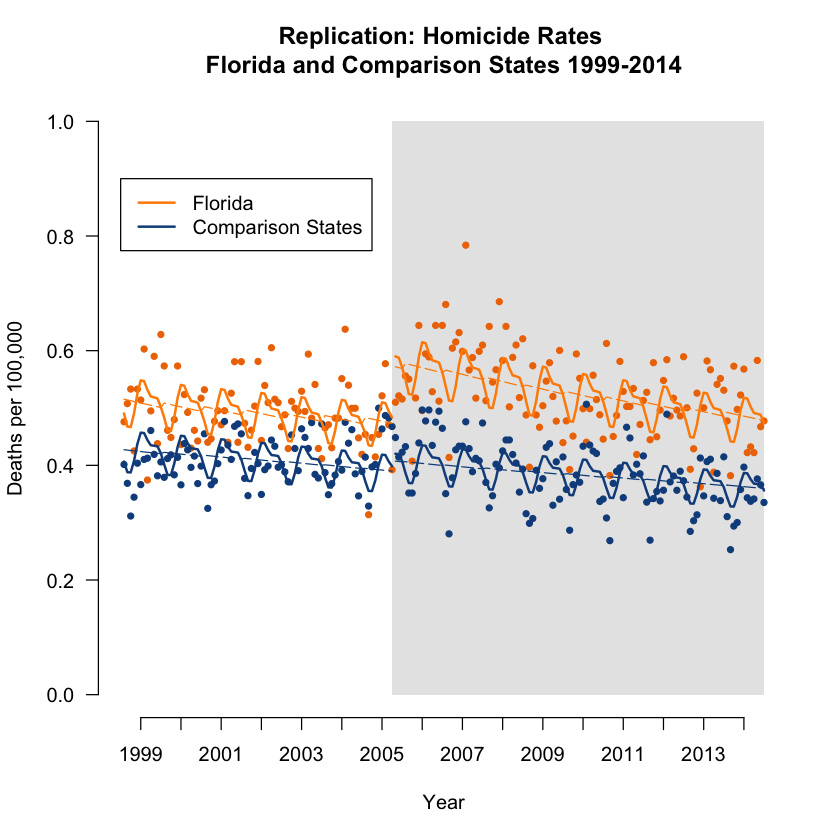

In [12]:
################
##  Figure 1A ##
################

repallhom <- subset(alldata, Cause=="AllHomicide" & Year < 2015)

##Sept 2001 was removed from the analysis but is added back in to graph
allhomtop<-repallhom[1:224,]
allhomtbottom <- repallhom[225:383,]

##Spet 2001 was given the mean monthly count and rate in the before period 
Sept2001 <- cbind("Sept.,2001", 2001,9,189.4, 0,0,46161275, 461.6128,30,0,1,"AllHomicide","Table1","All",.41)
colnames(Sept2001)<- colnames(repallhom)
allhomtop <- rbind(allhomtop, Sept2001)
repallhom <- rbind(allhomtop,allhomtbottom)
repallhom <- transform(repallhom, StdPop = as.numeric(StdPop), Deaths = as.numeric(Deaths), Year = as.numeric(Year),
                       Treatment = as.numeric(Treatment), Pop = as.numeric(Pop), Time = as.numeric(Time), 
                       Trend = as.numeric(Trend), Rate = as.numeric(Rate), MonthNo = as.numeric(MonthNo))

# Setup variables
repallhom$Level <- c(rep(0,81),rep(1,111),rep(0,81),rep(1,111))
repallhom$Time <- c(rep(c(1:192), 2))
repallhom$Trend <- rep(c(rep(0,81), 1:111),2)
repallhom$TXtime <- repallhom$Treatment * repallhom$Time
repallhom$TXlevel <- repallhom$Treatment * repallhom$Level
repallhom$TXtrend <- repallhom$Treatment * repallhom$Trend
repallhom_crappy <- glm(Rate ~ offset(log(StdPop)) + Time + Level + harmonic(MonthNo,2,12), 
                        family=quasipoisson, data=repallhom)
repallhom.mod <- with(repallhom, Deaths/StdPop)
repallhom.datanew <- data.frame(StdPop=mean(repallhom$StdPop),
                                Level=rep(c(0,1), c(819,1101)),
                                Time = 1:1920/10,
                                MonthNo = rep(1:120/10, 16))

# Models
repallhom.pred1 <- predict(repallhom_crappy,type="response",repallhom.datanew)/mean(repallhom$StdPop)
repallhom.pred2 <- predict(repallhom_crappy,type="response",transform(repallhom,MonthNo=4.8))/mean(repallhom$StdPop)

repallhom_linear <- glm(Rate ~ offset(log(StdPop)) + Time + Treatment + Level +  
                          TXtime + TXlevel, 
                        family=quasipoisson, data=repallhom)
repallhom_harmonic <- glm(Rate ~ offset(log(StdPop)) + Time + Treatment + Level + 
                            TXtime + TXlevel + harmonic(MonthNo,2,12), 
                          family=quasipoisson, data=repallhom)

###Plot for replication all homicide 
plot(repfirehom$Time[1:192],repfirehom.mod[1:192],
     type="n",
     ylim=c(0,1),
     frame.plot=F,
     ylab="Deaths per 100,000",
     xlab="Year",
     xaxt="n",
     las=2)
axis(1,at=0:15*12+6,tick=T,labels=1999:2014) 
rect(81,0,192,1, col=grey(0.9),border=F)
points(repallhom$Time[1:192],repallhom.mod[1:192],
       col="darkorange2",
       pch=20)
points(repallhom$Time[193:384],repallhom.mod[193:384],
       col="dodgerblue4",
       pch=20)
lines(repallhom$Time[1:81], fitted(repallhom_linear)[1:81], col="darkorange",lty=5)
lines(repallhom$Time[1:81], fitted(repallhom_harmonic)[1:81], col="darkorange",lwd=2)
lines(repallhom$Time[82:192], fitted(repallhom_linear)[82:192], col="darkorange",lty=5)
lines(repallhom$Time[82:192], fitted(repallhom_harmonic)[82:192], col="darkorange",lwd=2)
lines(repallhom$Time[193:273], fitted(repallhom_linear)[193:273], col="dodgerblue4",lty=5)
lines(repallhom$Time[193:273], fitted(repallhom_harmonic)[193:273], col="dodgerblue4",lwd=2)
lines(repallhom$Time[274:384], fitted(repallhom_linear)[274:384], col="dodgerblue4",lty=5)
lines(repallhom$Time[274:384], fitted(repallhom_harmonic)[274:384], col="dodgerblue4",lwd=2)
legend(x=0, y=0.9, legend=c("Florida","Comparison States"), col=c("darkorange","dodgerblue4"),lwd = 2)
title(main="Replication: Homicide Rates \nFlorida and Comparison States 1999-2014")

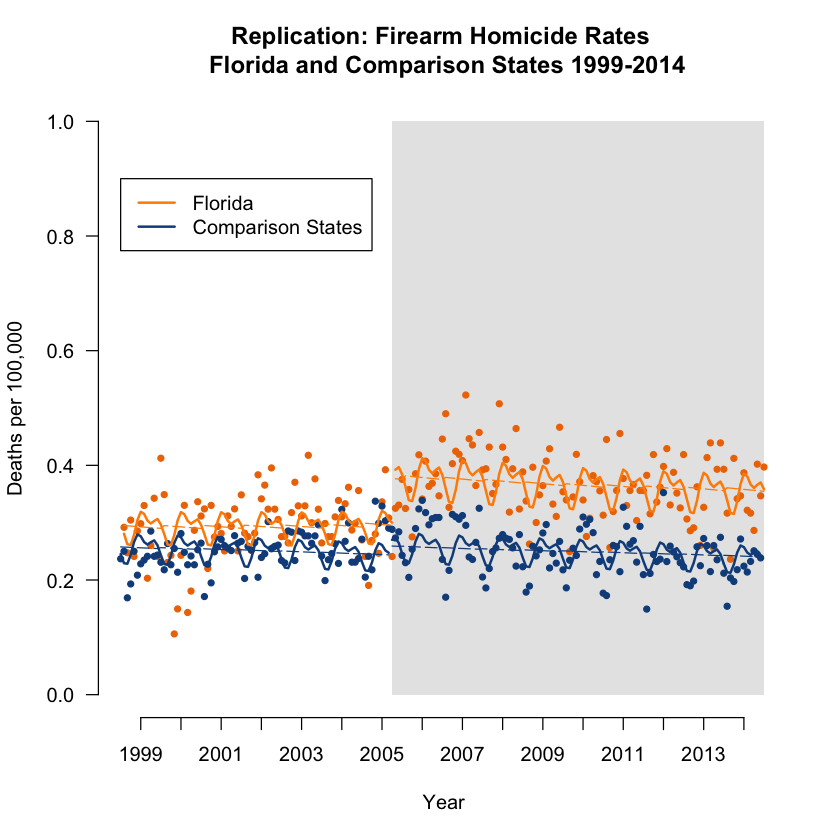

In [13]:
# Replication Plot for replication firearm homicide 
plot(repfirehom$Time[1:192],repfirehom.mod[1:192],
     type="n",
     ylim=c(0,1),
     frame.plot=F,
     ylab="Deaths per 100,000",
     xlab="Year",
     xaxt="n",
     las=2)
axis(1,at=0:15*12+6,tick=T,labels=1999:2014) 
rect(81,0,192,1, col=grey(0.9),border=F)
points(repfirehom$Time[1:192],repfirehom.mod[1:192],
       col="darkorange2",
       pch=20)
points(repfirehom$Time[193:384],repfirehom.mod[193:384],
       col="dodgerblue4",
       pch=20)
lines(repfirehom$Time[1:81], fitted(repfirehom_linear)[1:81], col="darkorange",lty=5)
lines(repfirehom$Time[1:81], fitted(repfirehom_harmonic)[1:81], col="darkorange",lwd=2)
lines(repfirehom$Time[82:192], fitted(repfirehom_linear)[82:192], col="darkorange",lty=5)
lines(repfirehom$Time[82:192], fitted(repfirehom_harmonic)[82:192], col="darkorange",lwd=2)
lines(repfirehom$Time[193:273], fitted(repfirehom_linear)[193:273], col="dodgerblue4",lty=5)
lines(repfirehom$Time[193:273], fitted(repfirehom_harmonic)[193:273], col="dodgerblue4",lwd=2)
lines(repfirehom$Time[274:384], fitted(repfirehom_linear)[274:384], col="dodgerblue4",lty=5)
lines(repfirehom$Time[274:384], fitted(repfirehom_harmonic)[274:384], col="dodgerblue4",lwd=2)
legend(x=0, y=0.9, legend=c("Florida","Comparison States"), col=c("darkorange","dodgerblue4"),lwd = 2)
title(main="Replication: Firearm Homicide Rates \n Florida and Comparison States 1999-2014")


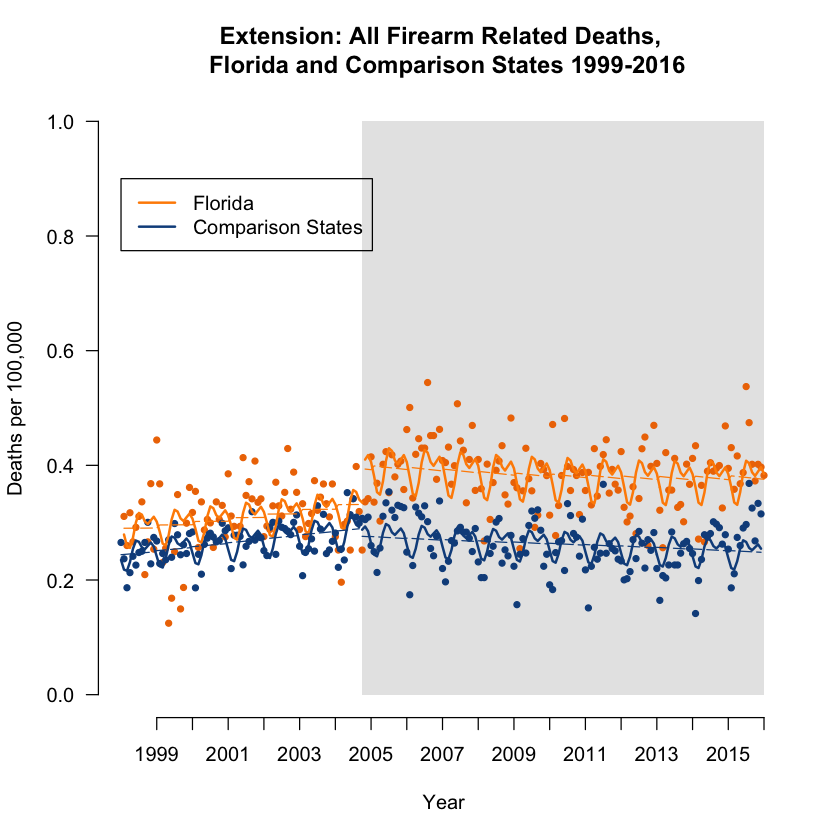

In [14]:
##########################################################################
###   EXTENSION FIGURE: All Firearm Related Deaths (Combo) 1999-2016   ###
##########################################################################

repcombo <- subset(alldata, Cause=="Combo")

# Setup variables
repcombo$Level <- c(rep(0,81),rep(1,135),rep(0,81),rep(1,135))
repcombo$TXtime <- repcombo$Treatment * repcombo$Time
repcombo$TXlevel <- repcombo$Treatment * repcombo$Level
repcombo$TXtrend <- repcombo$Treatment * repcombo$Trend

# Model
repcombo_linear <- glm(Rate ~ offset(log(StdPop)) + Time + Treatment + Level + Trend + 
                         TXtime + TXlevel + TXtrend, 
                       family=quasipoisson, data=repcombo)
repcombo_harmonic <- glm(Rate ~ offset(log(StdPop)) + Time + Treatment + Level + Trend + 
                           TXtime + TXlevel + TXtrend + harmonic(MonthNo,2,12), 
                         family=quasipoisson, data=repcombo) 

repcombo.mod <- with(repcombo, Deaths/StdPop)
repcombo.datanew <- data.frame(StdPop=repcombo$StdPop,Level=repcombo$Level, Times = repcombo$Time/10, MonthNo = repcombo$MonthNo/10)

repcombo.pred1 <- predict(repcombo_linear,type="response",repcombo)/repcombo$StdPop
repcombo.pred2 <- predict(repcombo_linear,type="response",transform(repcombo,MonthNo=4.8))/(repcombo$StdPop)

###Plot for combo extension 
plot(repcombo$Time[1:216],repcombo.mod[1:216],
     type="n",
     ylim=c(0,1),
     frame.plot=F,
     ylab="Deaths per 100,000",
     xlab="Year",
     xaxt="n",
     las=2)
axis(1,at=0:17*12+12,tick=T,labels=1999:2016) 
rect(81,0,216,1, col=grey(0.9),border=F)
points(repcombo$Time[1:216],repcombo.mod[1:216],
       col="darkorange2",
       pch=20)
points(repcombo$Time[217:432],repcombo.mod[217:432],
       col="dodgerblue4",
       pch=20)
lines(repcombo$Time[1:81], fitted(repcombo_linear)[1:81], col="darkorange",lty=5)
lines(repcombo$Time[1:81], fitted(repcombo_harmonic)[1:81], col="darkorange",lwd=2)
lines(repcombo$Time[82:216], fitted(repcombo_linear)[82:216], col="darkorange",lty=5)
lines(repcombo$Time[82:216], fitted(repcombo_harmonic)[82:216], col="darkorange",lwd=2)
lines(repcombo$Time[217:297], fitted(repcombo_linear)[217:297], col="dodgerblue4",lty=5)
lines(repcombo$Time[217:297], fitted(repcombo_harmonic)[217:297], col="dodgerblue4",lwd=2)
lines(repcombo$Time[298:432], fitted(repcombo_linear)[298:432], col="dodgerblue4",lty=5)
lines(repcombo$Time[298:432], fitted(repcombo_harmonic)[298:432], col="dodgerblue4",lwd=2)
legend(x=0, y=0.9, legend=c("Florida","Comparison States"), col=c("darkorange","dodgerblue4"),lwd = 2)
title(main="Extension: All Firearm Related Deaths, \n Florida and Comparison States 1999-2016")


In [16]:
# load data #
repdata <- read.csv("dataverse/Table 2 Replication Data.csv")

# add columns
repdata$StdPop <- repdata$Population / 100000
repdata$Rate <- repdata$Deaths / repdata$StdPop
repdata$Treatment <- (rep(1, 8856))
repdata$Time <- c(rep(c(1:216), 41))
repdata$After <- rep(c(rep(0,81), rep(1,135)),41)
repdata$Trend <- rep(c(rep(0,81), 1:135),41)

##  SUBSET THE DATA  ##

# Homicide 
hom.white <- subset(repdata, Characteristic == "White" & Cause == "Homicide" & Year <2015)
hom.black <- subset(repdata, Characteristic == "Black or African American" & Cause == "Homicide" & Year <2015)
hom.male <- subset(repdata, Characteristic == "M" & Cause == "Homicide" & Year <2015)
hom.female <- subset(repdata, Characteristic == "F" & Cause == "Homicide" & Year <2015)
hom.20_34 <- subset(repdata, Characteristic == "20-34" & Cause == "Homicide" & Year <2015)
hom.35over <- subset(repdata, Characteristic == "35 and over" & Cause == "Homicide" & Year <2015)

# Suicide 
suic.white <- subset(repdata, Characteristic == "White" & Cause == "Suicide" & Year <2015)
suic.black <- subset(repdata, Characteristic == "Black or African American" & Cause == "Suicide" & Year <2015)
suic.male <- subset(repdata, Characteristic == "M" & Cause == "Suicide" & Year <2015)
suic.female <- subset(repdata, Characteristic == "F" & Cause == "Suicide" & Year <2015)
suic.20_34 <- subset(repdata, Characteristic == "20-34" & Cause == "Suicide" & Year <2015)
suic.35over <- subset(repdata, Characteristic == "35 and over" & Cause == "Suicide" & Year <2015)

# Firearm Homicide
FAhom.white <- subset(repdata, Characteristic == "White" & Cause == "Firearm Homicide" & Year <2015)
FAhom.black <- subset(repdata, Characteristic == "Black or African American" & Cause == "Firearm Homicide" & Year <2015)
FAhom.male <- subset(repdata, Characteristic == "M" & Cause == "Firearm Homicide" & Year <2015)
FAhom.20_34 <- subset(repdata, Characteristic == "20-34" & Cause == "Firearm Homicide" & Year <2015)
FAhom.35over <- subset(repdata, Characteristic == "35 and over" & Cause == "Firearm Homicide" & Year <2015)

# Firearm Suicide
FAsuic.white <- subset(repdata, Characteristic == "White" & Cause == "Firearm Suicide" & Year <2015)
FAsuic.black <- subset(repdata, Characteristic == "Black or African American" & Cause == "Firearm Suicide" & Year <2015)
FAsuic.male <- subset(repdata, Characteristic == "M" & Cause == "Firearm Suicide" & Year <2015)
FAsuic.female <- subset(repdata, Characteristic == "F" & Cause == "Firearm Suicide" & Year <2015)
FAsuic.20_34 <- subset(repdata, Characteristic == "20-34" & Cause == "Firearm Suicide" & Year <2015)
FAsuic.35over <- subset(repdata, Characteristic == "35 and over" & Cause == "Firearm Suicide" & Year <2015)

In [17]:
###########################
##  MEAN MONTHLY COUNTS  ##
###########################

# Homicide 

summary(hom.white$Deaths[repdata$After==0])
summary(hom.white$Deaths[repdata$After==1])

summary(hom.black$Deaths[repdata$After==0])
summary(hom.black$Deaths[repdata$After==1])

summary(hom.20_34$Deaths[repdata$After==0])
summary(hom.20_34$Deaths[repdata$After==1])

summary(hom.35over$Deaths[repdata$After==0])
summary(hom.35over$Deaths[repdata$After==1])

summary(hom.male$Deaths[repdata$After==0])
summary(hom.male$Deaths[repdata$After==1])

summary(hom.female$Deaths[repdata$After==0])
summary(hom.female$Deaths[repdata$After==1])

# Suicide

summary(suic.white$Deaths[repdata$After==0])
summary(suic.white$Deaths[repdata$After==1])

summary(suic.20_34$Deaths[repdata$After==0])
summary(suic.20_34$Deaths[repdata$After==1])

summary(suic.35over$Deaths[repdata$After==0])
summary(suic.35over$Deaths[repdata$After==1])

summary(suic.male$Deaths[repdata$After==0])
summary(suic.male$Deaths[repdata$After==1])

summary(suic.female$Deaths[repdata$After==0])
summary(suic.female$Deaths[repdata$After==1])

# Firearm Homicide

summary(FAhom.white$Deaths[repdata$After==0])
summary(FAhom.white$Deaths[repdata$After==1])

summary(FAhom.black$Deaths[repdata$After==0])
summary(FAhom.black$Deaths[repdata$After==1])

summary(FAhom.20_34$Deaths[repdata$After==0])
summary(FAhom.20_34$Deaths[repdata$After==1])

summary(FAhom.35over$Deaths[repdata$After==0])
summary(FAhom.35over$Deaths[repdata$After==1])

summary(FAhom.male$Deaths[repdata$After==0])
summary(FAhom.male$Deaths[repdata$After==1])

# Firearm Suicide

summary(FAsuic.white$Deaths[repdata$After==0])
summary(FAsuic.white$Deaths[repdata$After==1])

summary(FAsuic.20_34$Deaths[repdata$After==0])
summary(FAsuic.20_34$Deaths[repdata$After==1])

summary(FAsuic.35over$Deaths[repdata$After==0])
summary(FAsuic.35over$Deaths[repdata$After==1])

summary(FAsuic.male$Deaths[repdata$After==0])
summary(FAsuic.male$Deaths[repdata$After==1])

summary(FAsuic.female$Deaths[repdata$After==0])
summary(FAsuic.female$Deaths[repdata$After==1])


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  32.00   39.00   43.00   44.52   50.00   62.00    3240 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  29.00   44.00   49.00   49.84   55.00   75.00    5424 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  18.00   33.00   36.00   36.53   42.00   53.00    3240 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  28.00   42.00   48.00   48.23   54.50   67.00    5424 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   14.0    27.0    32.0    31.8    36.0    55.0    3240 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  27.00   37.50   42.00   41.94   47.00   59.00    5424 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  26.00   33.00   38.00   38.15   42.00   56.00    3240 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  24.00   38.00   44.00   42.61   47.50   67.00    5424 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  41.00   54.00   59.00   60.75   66.00   84.00    3240 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  52.00   69.00   77.00   77.04   86.00  111.00    5424 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  10.00   19.00   21.00   21.17   24.00   37.00    3240 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  11.00   19.00   22.00   22.19   25.00   35.00    5424 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
    129     166     179     177     191     222    3240 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
    148     198     216     217     236     294    5424 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  19.00   31.00   34.00   34.53   37.00   51.00    3240 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  23.00   36.00   41.00   40.87   45.00   61.00    5424 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  104.0   135.0   148.0   146.8   163.0   188.0    3240 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  129.0   168.5   184.0   184.2   197.0   244.0    5424 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  100.0   135.0   148.0   145.7   157.0   180.0    3240 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  120.0   165.5   178.0   179.4   194.5   241.0    5424 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  22.00   38.00   42.00   42.54   48.00   60.00    3240 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  30.00   47.00   53.00   53.13   58.50   86.00    5424 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  12.00   20.00   22.00   22.54   27.00   34.00    3240 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  18.00   25.00   30.00   29.96   33.00   46.00    5424 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  10.00   23.00   27.00   26.25   30.00   44.00    3241 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  18.00   34.00   38.00   38.65   44.00   55.00    5424 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  10.00   20.00   24.00   23.51   26.00   46.00    3241 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  21.00   30.50   34.00   34.35   38.50   49.00    5424 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   10.0    16.0    20.0    19.4    22.0    31.0    3241 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  10.00   21.00   25.00   25.38   30.00   40.00    5424 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  14.00   35.00   40.00   39.67   44.00   64.00    3240 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  35.00   50.50   57.00   57.05   63.50   82.00    5424 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  65.00   85.00   92.00   93.63  103.00  128.00    3240 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   68.0   102.5   114.0   112.3   122.0   153.0    5424 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  10.00   13.75   17.00   16.75   19.00   31.00    3241 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   10.0    16.0    19.0    19.3    22.0    34.0    5425 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  59.00   72.00   79.00   79.69   86.00  106.00    3240 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  56.00   87.50   97.00   96.95  106.50  136.00    5424 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  64.00   76.00   83.00   84.53   93.00  107.00    3240 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   58.0    93.0   101.0   101.5   110.0   137.0    5424 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  10.00   12.25   15.50   15.43   17.75   25.00    3247 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  10.00   15.75   18.00   18.29   20.25   33.00    5427 

In [18]:
# Homicide

summary(hom.white$Rate[repdata$After==0])
summary(hom.white$Rate[repdata$After==1])

summary(hom.black$Rate[repdata$After==0])
summary(hom.black$Rate[repdata$After==1])

summary(hom.20_34$Rate[repdata$After==0])
summary(hom.20_34$Rate[repdata$After==1])

summary(hom.35over$Rate[repdata$After==0])
summary(hom.35over$Rate[repdata$After==1])

summary(hom.male$Rate[repdata$After==0])
summary(hom.male$Rate[repdata$After==1])

summary(hom.female$Rate[repdata$After==0])
summary(hom.female$Rate[repdata$After==1])

# Suicide

summary(suic.white$Rate[repdata$After==0])
summary(suic.white$Rate[repdata$After==1])

summary(suic.20_34$Rate[repdata$After==0])
summary(suic.20_34$Rate[repdata$After==1])

summary(suic.35over$Rate[repdata$After==0])
summary(suic.35over$Rate[repdata$After==1])

summary(suic.male$Rate[repdata$After==0])
summary(suic.male$Rate[repdata$After==1])

summary(suic.female$Rate[repdata$After==0])
summary(suic.female$Rate[repdata$After==1])

# Firearm Homicide

summary(FAhom.white$Rate[repdata$After==0])
summary(FAhom.white$Rate[repdata$After==1])

summary(FAhom.black$Rate[repdata$After==0])
summary(FAhom.black$Rate[repdata$After==1])

summary(FAhom.20_34$Rate[repdata$After==0])
summary(FAhom.20_34$Rate[repdata$After==1])

summary(FAhom.35over$Rate[repdata$After==0])
summary(FAhom.35over$Rate[repdata$After==1])

summary(FAhom.male$Rate[repdata$After==0])
summary(FAhom.male$Rate[repdata$After==1])

# Firearm Suicide

summary(FAsuic.white$Rate[repdata$After==0])
summary(FAsuic.white$Rate[repdata$After==1])

summary(FAsuic.20_34$Rate[repdata$After==0])
summary(FAsuic.20_34$Rate[repdata$After==1])

summary(FAsuic.35over$Rate[repdata$After==0])
summary(FAsuic.35over$Rate[repdata$After==1])

summary(FAsuic.male$Rate[repdata$After==0])
summary(FAsuic.male$Rate[repdata$After==1])

summary(FAsuic.female$Rate[repdata$After==0])
summary(FAsuic.female$Rate[repdata$After==1])

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  0.224   0.286   0.324   0.330   0.370   0.459    3240 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  0.197   0.293   0.330   0.335   0.367   0.514    5424 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  0.746   1.280   1.395   1.417   1.600   1.882    3240 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  0.920   1.394   1.516   1.557   1.765   2.237    5424 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  0.473   0.894   1.005   1.016   1.152   1.727    3240 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  0.728   1.013   1.181   1.174   1.330   1.706    5424 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  0.265   0.347   0.408   0.408   0.451   0.624    3240 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  0.230   0.346   0.398   0.394   0.439   0.644    5424 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  0.470   0.666   0.712   0.744   0.807   1.031    3240 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  0.557   0.750   0.825   0.834   0.922   1.235    5424 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  0.110   0.218   0.245   0.248   0.281   0.416    3240 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  0.113   0.191   0.225   0.230   0.262   0.367    5424 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  0.999   1.230   1.309   1.308   1.406   1.643    3240 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  1.022   1.350   1.450   1.456   1.566   1.899    5424 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  0.629   0.980   1.107   1.103   1.207   1.601    3240 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  0.660   1.018   1.137   1.140   1.263   1.586    5424 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  1.173   1.432   1.550   1.564   1.692   2.006    3240 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  1.256   1.575   1.685   1.700   1.830   2.152    5424 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  1.280   1.635   1.774   1.784   1.926   2.209    3240 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  1.350   1.810   1.914   1.938   2.087   2.479    5424 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  0.268   0.445   0.494   0.496   0.550   0.674    3240 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  0.307   0.482   0.553   0.549   0.600   0.846    5424 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  0.092   0.143   0.163   0.167   0.199   0.263    3240 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  0.118   0.170   0.200   0.202   0.222   0.318    5424 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  0.410   0.877   1.033   1.014   1.164   1.588    3241 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  0.621   1.102   1.229   1.247   1.457   1.703    5424 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  0.331   0.654   0.759   0.749   0.828   1.444    3241 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  0.564   0.832   0.960   0.961   1.102   1.417    5424 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  0.111   0.169   0.207   0.207   0.237   0.324    3241 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  0.087   0.191   0.234   0.235   0.276   0.384    5424 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  0.179   0.417   0.482   0.485   0.549   0.770    3240 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  0.380   0.543   0.614   0.618   0.689   0.912    5424 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  0.474   0.636   0.690   0.693   0.751   0.933    3240 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  0.469   0.690   0.756   0.753   0.819   1.022    5424 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  0.299   0.439   0.536   0.537   0.620   0.973    3241 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  0.299   0.459   0.522   0.538   0.608   0.913    5425 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  0.638   0.764   0.846   0.850   0.927   1.108    3240 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  0.545   0.811   0.898   0.894   0.968   1.240    5424 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  0.757   0.928   1.034   1.036   1.139   1.288    3240 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  0.653   1.018   1.092   1.096   1.194   1.467    5424 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  0.117   0.148   0.180   0.180   0.208   0.281    3247 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  0.107   0.157   0.184   0.189   0.210   0.334    5427 


	Breusch-Godfrey test for serial correlation of order up to 1

data:  m.hom.white
LM test = 0.057443, df = 1, p-value = 0.8106



	Breusch-Godfrey test for serial correlation of order up to 12

data:  m.hom.white
LM test = 7.8157, df = 12, p-value = 0.7994



	Breusch-Godfrey test for serial correlation of order up to 1

data:  sm.hom.white
LM test = 0.37586, df = 1, p-value = 0.5398



	Breusch-Godfrey test for serial correlation of order up to 12

data:  sm.hom.white
LM test = 8.5127, df = 12, p-value = 0.7439


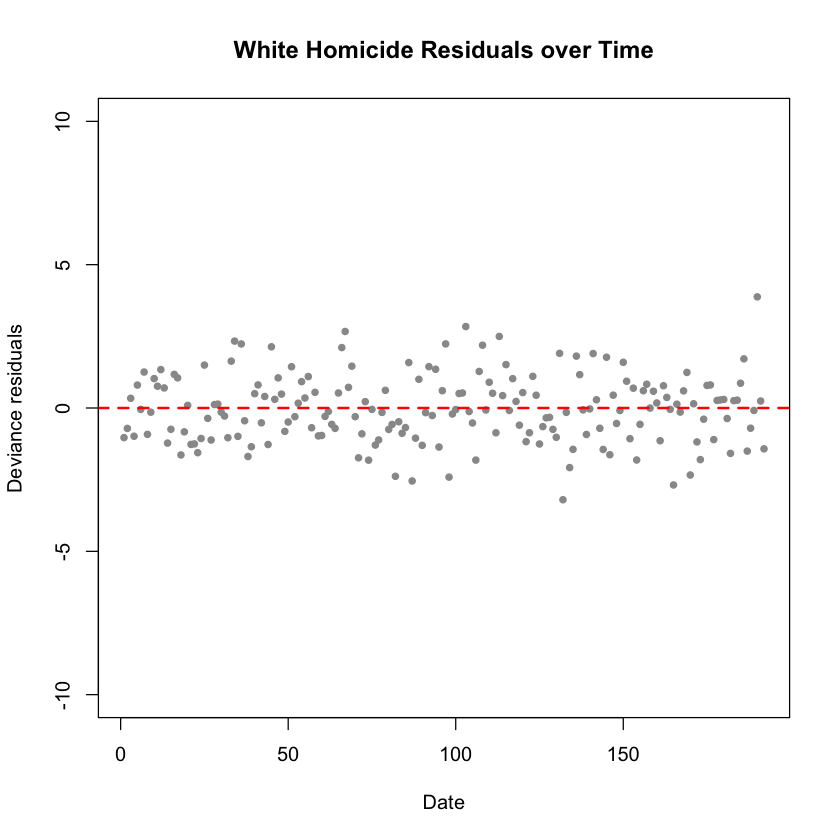


	Breusch-Godfrey test for serial correlation of order up to 1

data:  m.hom.black
LM test = 0.76222, df = 1, p-value = 0.3826



	Breusch-Godfrey test for serial correlation of order up to 12

data:  m.hom.black
LM test = 11.298, df = 12, p-value = 0.5036



	Breusch-Godfrey test for serial correlation of order up to 1

data:  sm.hom.black
LM test = 0.01039, df = 1, p-value = 0.9188



	Breusch-Godfrey test for serial correlation of order up to 12

data:  sm.hom.black
LM test = 11.581, df = 12, p-value = 0.4799


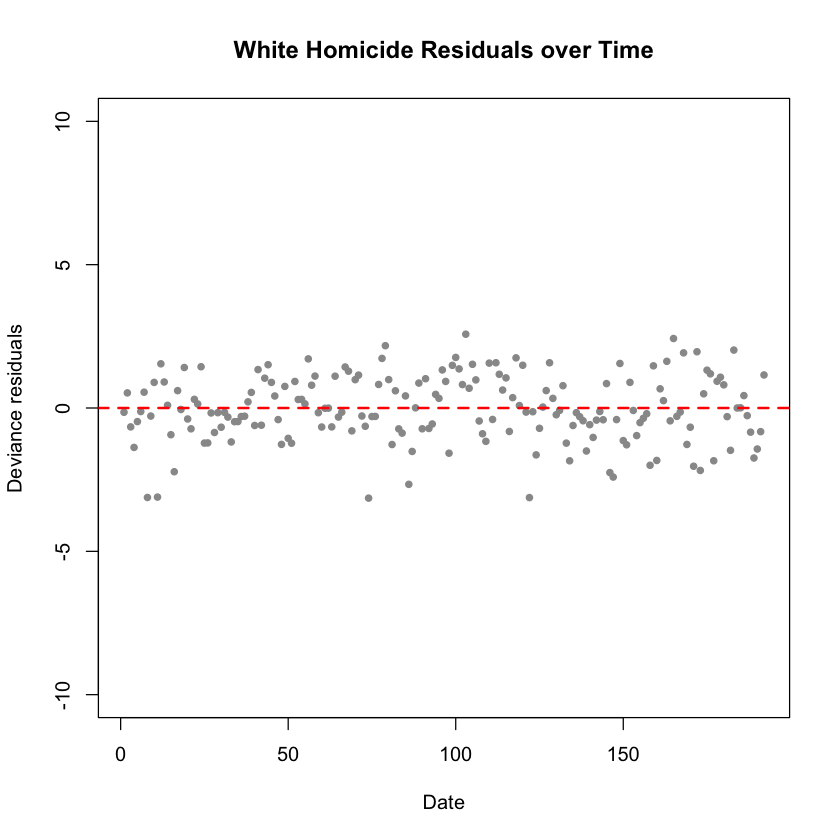


	Breusch-Godfrey test for serial correlation of order up to 1

data:  m.hom.20_34
LM test = 3.3242, df = 1, p-value = 0.06827



	Breusch-Godfrey test for serial correlation of order up to 12

data:  m.hom.20_34
LM test = 13.215, df = 12, p-value = 0.3536



	Breusch-Godfrey test for serial correlation of order up to 1

data:  sm.hom.20_34
LM test = 2.3788, df = 1, p-value = 0.123



	Breusch-Godfrey test for serial correlation of order up to 12

data:  sm.hom.20_34
LM test = 11.983, df = 12, p-value = 0.447


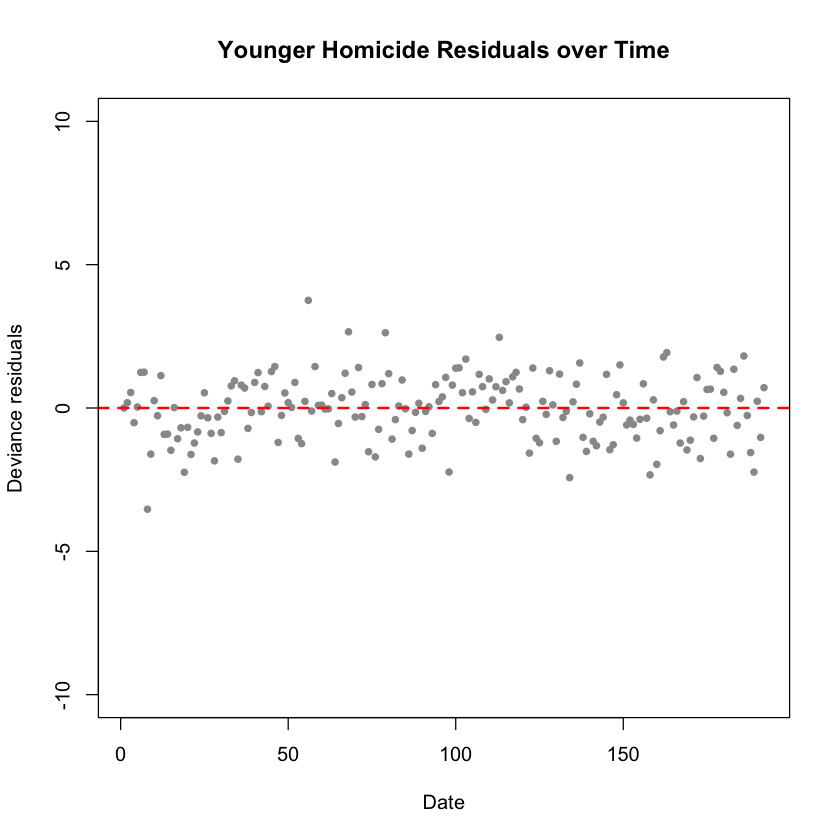


	Breusch-Godfrey test for serial correlation of order up to 1

data:  m.hom.35over
LM test = 1.1094, df = 1, p-value = 0.2922



	Breusch-Godfrey test for serial correlation of order up to 12

data:  m.hom.35over
LM test = 7.8202, df = 12, p-value = 0.799



	Breusch-Godfrey test for serial correlation of order up to 1

data:  sm.hom.35over
LM test = 0.036566, df = 1, p-value = 0.8484



	Breusch-Godfrey test for serial correlation of order up to 12

data:  sm.hom.35over
LM test = 4.7819, df = 12, p-value = 0.9649


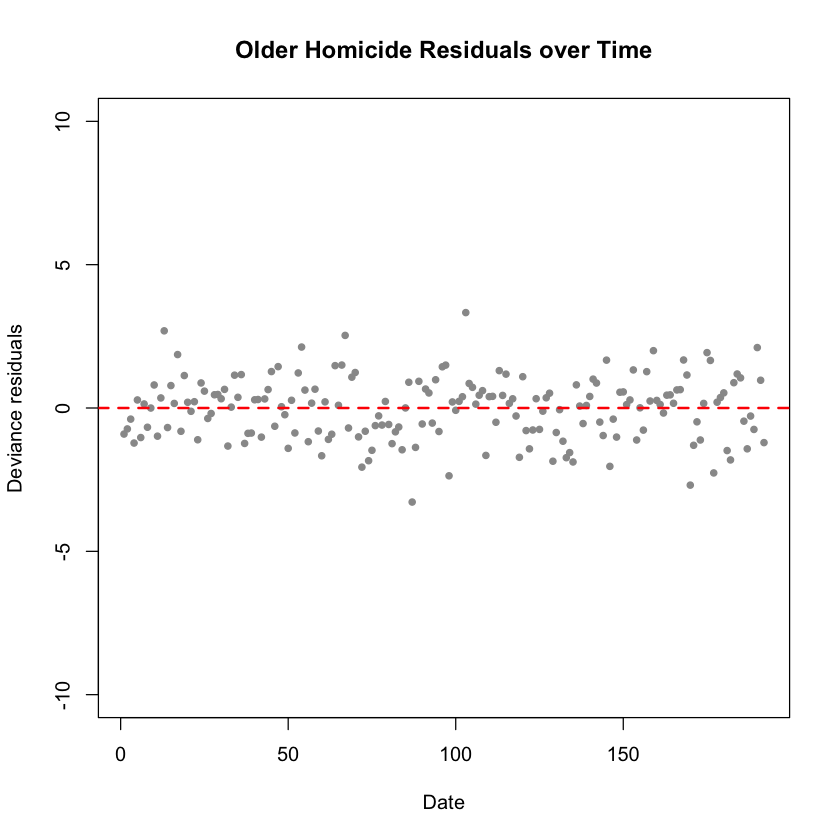


	Breusch-Godfrey test for serial correlation of order up to 1

data:  m.hom.male
LM test = 0.54556, df = 1, p-value = 0.4601



	Breusch-Godfrey test for serial correlation of order up to 12

data:  m.hom.male
LM test = 12.285, df = 12, p-value = 0.4231



	Breusch-Godfrey test for serial correlation of order up to 1

data:  sm.hom.male
LM test = 0.062989, df = 1, p-value = 0.8018



	Breusch-Godfrey test for serial correlation of order up to 12

data:  sm.hom.male
LM test = 15.595, df = 12, p-value = 0.2105


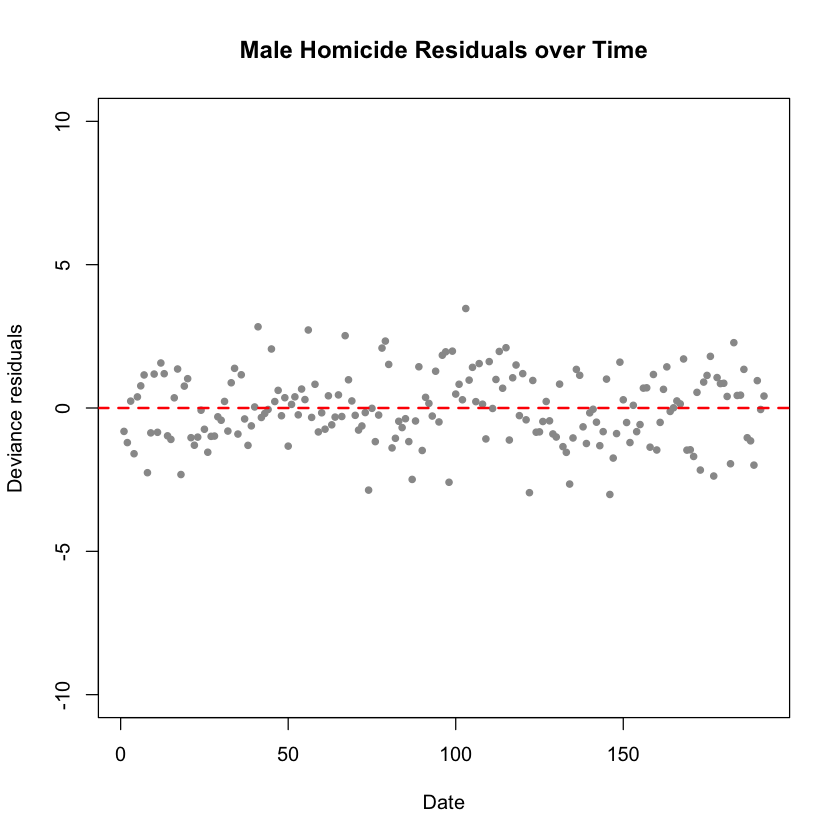


	Breusch-Godfrey test for serial correlation of order up to 1

data:  m.hom.female
LM test = 0.73939, df = 1, p-value = 0.3899



	Breusch-Godfrey test for serial correlation of order up to 12

data:  m.hom.female
LM test = 8.801, df = 12, p-value = 0.7198



	Breusch-Godfrey test for serial correlation of order up to 1

data:  sm.hom.female
LM test = 0.52907, df = 1, p-value = 0.467



	Breusch-Godfrey test for serial correlation of order up to 12

data:  sm.hom.female
LM test = 8.2147, df = 12, p-value = 0.7681


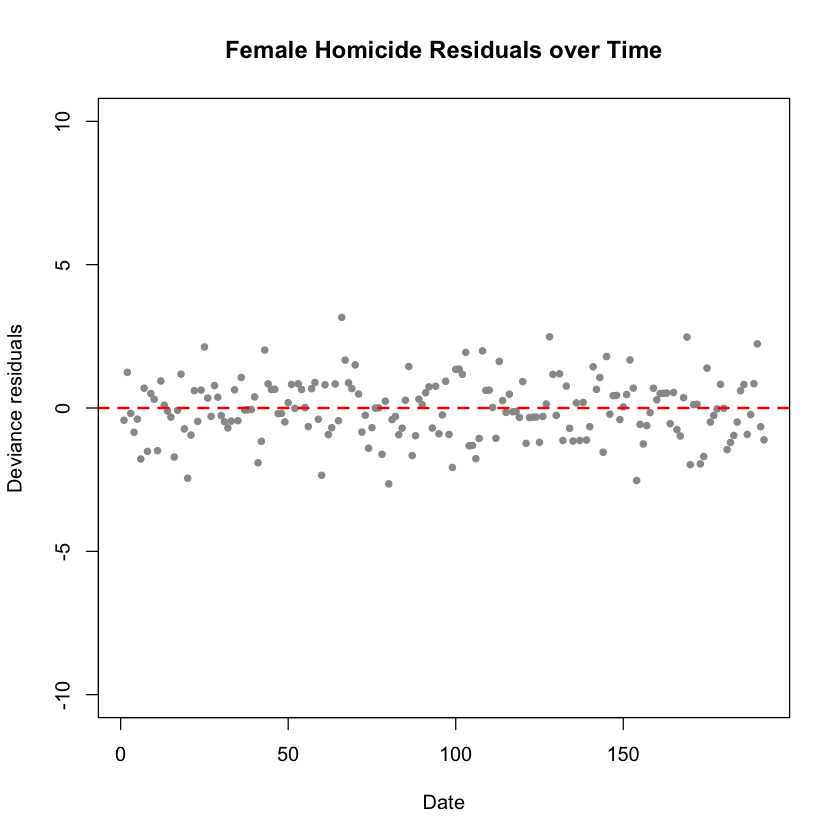

In [19]:
###############################################
##  Step Change & Tests for Autocorrelation  ##
###############################################

###  HOMICIDE  ###

# WHITE #

## Non-Seasonal Model
m.hom.white <- glm(Deaths ~ offset(log(StdPop)) + After + Time, 
                          family=quasipoisson, data = hom.white)
# Residual plot
hom.white.res1 <- residuals(m.hom.white,type="deviance")

plot(hom.white$Time,hom.white.res1,ylim=c(-10,10),pch=19,cex=0.7,col=grey(0.6),
     main="White Homicide Residuals over Time",ylab="Deviance residuals",xlab="Date")
abline(h=0,lty=2,lwd=2, col = "red")

# Breusch-Godfrey test for autocorrelation
bgtest(m.hom.white)
bgtest(m.hom.white, order=12)

## Seasonal model
sm.hom.white <- glm(Deaths ~ offset(log(StdPop)) + After + Time + harmonic(MonthNo,2,12), 
                   family=quasipoisson, data = hom.white)

# Seasonal Breusch-Godfrey test for autocorrelation
bgtest(sm.hom.white)
bgtest(sm.hom.white, order=12)


# BLACK #

## Non-Seasonal Model
m.hom.black <- glm(Deaths ~ offset(log(StdPop)) + After + Time, 
                   family=quasipoisson, data = hom.black)
# Residual plot
hom.black.res1 <- residuals(m.hom.black,type="deviance")

plot(hom.black$Time,hom.black.res1,ylim=c(-10,10),pch=19,cex=0.7,col=grey(0.6),
     main="White Homicide Residuals over Time",ylab="Deviance residuals",xlab="Date")
abline(h=0,lty=2,lwd=2, col = "red")

# Breusch-Godfrey test for autocorrelation
bgtest(m.hom.black)
bgtest(m.hom.black, order=12)

## Seasonal model
sm.hom.black <- glm(Deaths ~ offset(log(StdPop)) + After + Time + harmonic(MonthNo,2,12), 
                    family=quasipoisson, data = hom.black)

# Seasonal Breusch-Godfrey test for autocorrelation
bgtest(sm.hom.black)
bgtest(sm.hom.black, order=12)


# YOUNGER #

## Non-Seasonal Model
m.hom.20_34 <- glm(Deaths ~ offset(log(StdPop)) + After + Time, 
                   family=quasipoisson, data = hom.20_34)
# Residual plot
hom.20_34.res1 <- residuals(m.hom.20_34,type="deviance")

plot(hom.20_34$Time,hom.20_34.res1,ylim=c(-10,10),pch=19,cex=0.7,col=grey(0.6),
     main="Younger Homicide Residuals over Time",ylab="Deviance residuals",xlab="Date")
abline(h=0,lty=2,lwd=2, col = "red")

# Breusch-Godfrey test for autocorrelation
bgtest(m.hom.20_34)            #p = 0.068
bgtest(m.hom.20_34, order=12)

## Seasonal model
sm.hom.20_34 <- glm(Deaths ~ offset(log(StdPop)) + After + Time + harmonic(MonthNo,2,12), 
                    family=quasipoisson, data = hom.20_34)

# Seasonal Breusch-Godfrey test for autocorrelation
bgtest(sm.hom.20_34)
bgtest(sm.hom.20_34, order=12)


# OLDER #

## Non-Seasonal Model
m.hom.35over <- glm(Deaths ~ offset(log(StdPop)) + After + Time, 
                   family=quasipoisson, data = hom.35over)
# Residual plot
hom.35over.res1 <- residuals(m.hom.35over,type="deviance")

plot(hom.35over$Time,hom.35over.res1,ylim=c(-10,10),pch=19,cex=0.7,col=grey(0.6),
     main="Older Homicide Residuals over Time",ylab="Deviance residuals",xlab="Date")
abline(h=0,lty=2,lwd=2, col = "red")

# Breusch-Godfrey test for autocorrelation
bgtest(m.hom.35over)  
bgtest(m.hom.35over, order=12)

## Seasonal model
sm.hom.35over <- glm(Deaths ~ offset(log(StdPop)) + After + Time + harmonic(MonthNo,2,12), 
                    family=quasipoisson, data = hom.35over)

# Seasonal Breusch-Godfrey test for autocorrelation
bgtest(sm.hom.35over)
bgtest(sm.hom.35over, order=12)


# MALE #

## Non-Seasonal Model
m.hom.male <- glm(Deaths ~ offset(log(StdPop)) + After + Time, 
                    family=quasipoisson, data = hom.male)
# Residual plot
hom.male.res1 <- residuals(m.hom.male,type="deviance")

plot(hom.male$Time,hom.male.res1,ylim=c(-10,10),pch=19,cex=0.7,col=grey(0.6),
     main="Male Homicide Residuals over Time",ylab="Deviance residuals",xlab="Date")
abline(h=0,lty=2,lwd=2, col = "red")

# Breusch-Godfrey test for autocorrelation
bgtest(m.hom.male)  
bgtest(m.hom.male, order=12)

## Seasonal model
sm.hom.male <- glm(Deaths ~ offset(log(StdPop)) + After + Time + harmonic(MonthNo,2,12), 
                     family=quasipoisson, data = hom.male)

# Seasonal Breusch-Godfrey test for autocorrelation
bgtest(sm.hom.male)
bgtest(sm.hom.male, order=12)
       

# FEMALE #

## Non-Seasonal Model
m.hom.female <- glm(Deaths ~ offset(log(StdPop)) + After + Time, 
                  family=quasipoisson, data = hom.female)
# Residual plot
hom.female.res1 <- residuals(m.hom.female,type="deviance")

plot(hom.female$Time,hom.female.res1,ylim=c(-10,10),pch=19,cex=0.7,col=grey(0.6),
     main="Female Homicide Residuals over Time",ylab="Deviance residuals",xlab="Date")
abline(h=0,lty=2,lwd=2, col = "red")

# Breusch-Godfrey test for autocorrelation
bgtest(m.hom.female)  
bgtest(m.hom.female, order=12)

## Seasonal model
sm.hom.female <- glm(Deaths ~ offset(log(StdPop)) + After + Time + harmonic(MonthNo,2,12), 
                   family=quasipoisson, data = hom.female)

# Seasonal Breusch-Godfrey test for autocorrelation
bgtest(sm.hom.female)
bgtest(sm.hom.female, order=12)


	Breusch-Godfrey test for serial correlation of order up to 1

data:  m.suic.white
LM test = 6.6115, df = 1, p-value = 0.01013



	Breusch-Godfrey test for serial correlation of order up to 12

data:  m.suic.white
LM test = 29.65, df = 12, p-value = 0.003152



	Breusch-Godfrey test for serial correlation of order up to 1

data:  sm.suic.white
LM test = 2.9046, df = 1, p-value = 0.08833



	Breusch-Godfrey test for serial correlation of order up to 12

data:  sm.suic.white
LM test = 21.871, df = 12, p-value = 0.03899


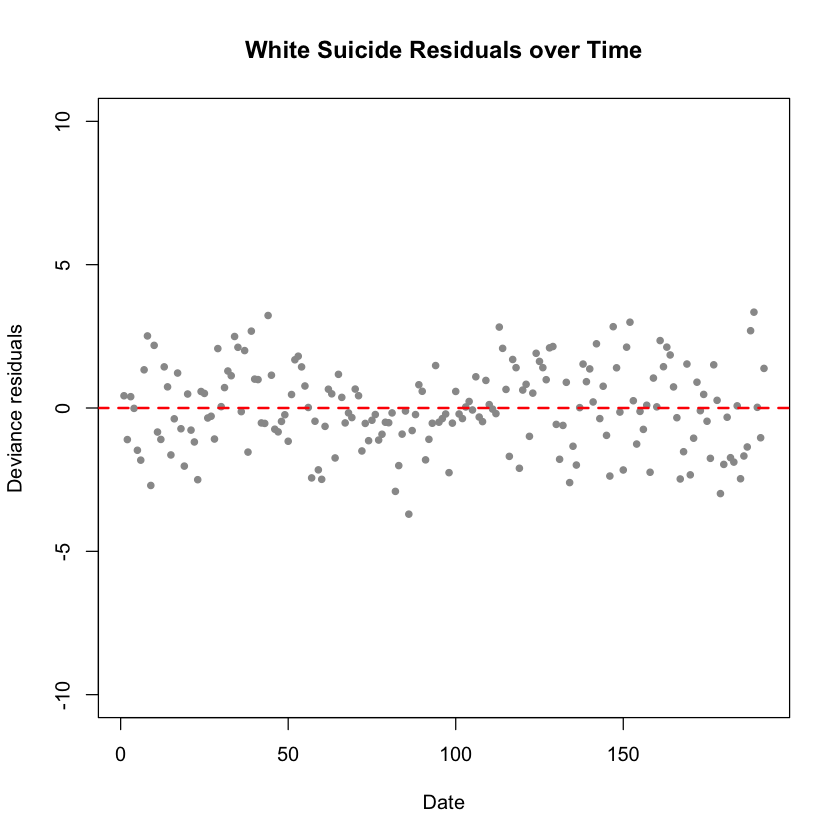


	Breusch-Godfrey test for serial correlation of order up to 1

data:  m.suic.20_34
LM test = 0.079773, df = 1, p-value = 0.7776



	Breusch-Godfrey test for serial correlation of order up to 12

data:  m.suic.20_34
LM test = 10.412, df = 12, p-value = 0.5799



	Breusch-Godfrey test for serial correlation of order up to 1

data:  sm.suic.20_34
LM test = 1.0834, df = 1, p-value = 0.2979



	Breusch-Godfrey test for serial correlation of order up to 12

data:  sm.suic.20_34
LM test = 14.252, df = 12, p-value = 0.2849


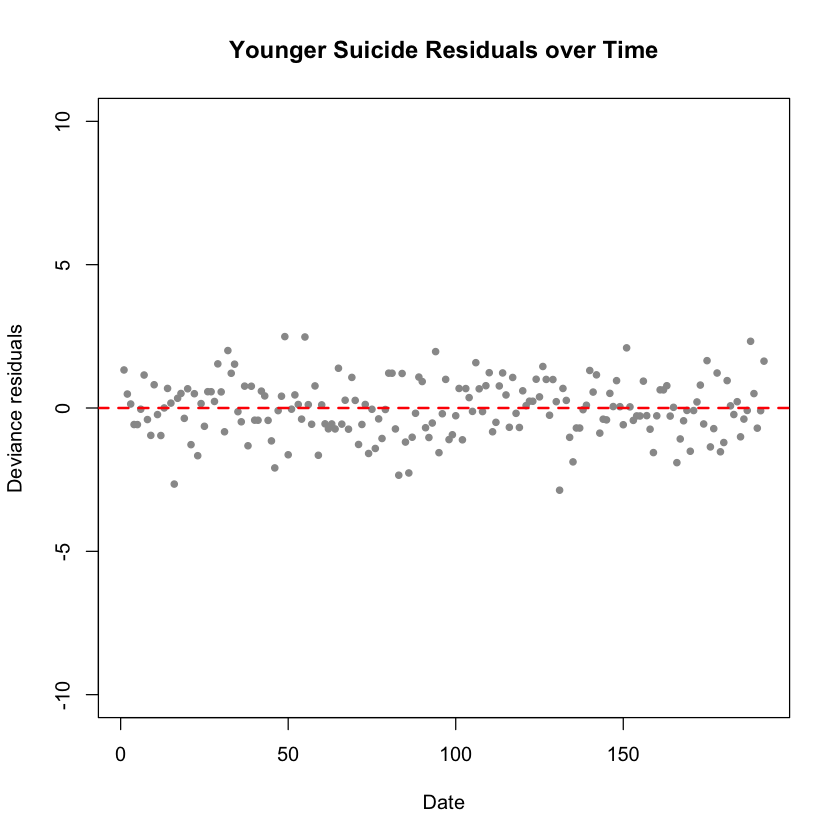


	Breusch-Godfrey test for serial correlation of order up to 1

data:  m.suic.35over
LM test = 4.5295, df = 1, p-value = 0.03332



	Breusch-Godfrey test for serial correlation of order up to 12

data:  m.suic.35over
LM test = 30.025, df = 12, p-value = 0.002769



	Breusch-Godfrey test for serial correlation of order up to 1

data:  sm.suic.35over
LM test = 1.0924, df = 1, p-value = 0.296



	Breusch-Godfrey test for serial correlation of order up to 12

data:  sm.suic.35over
LM test = 20.34, df = 12, p-value = 0.06092


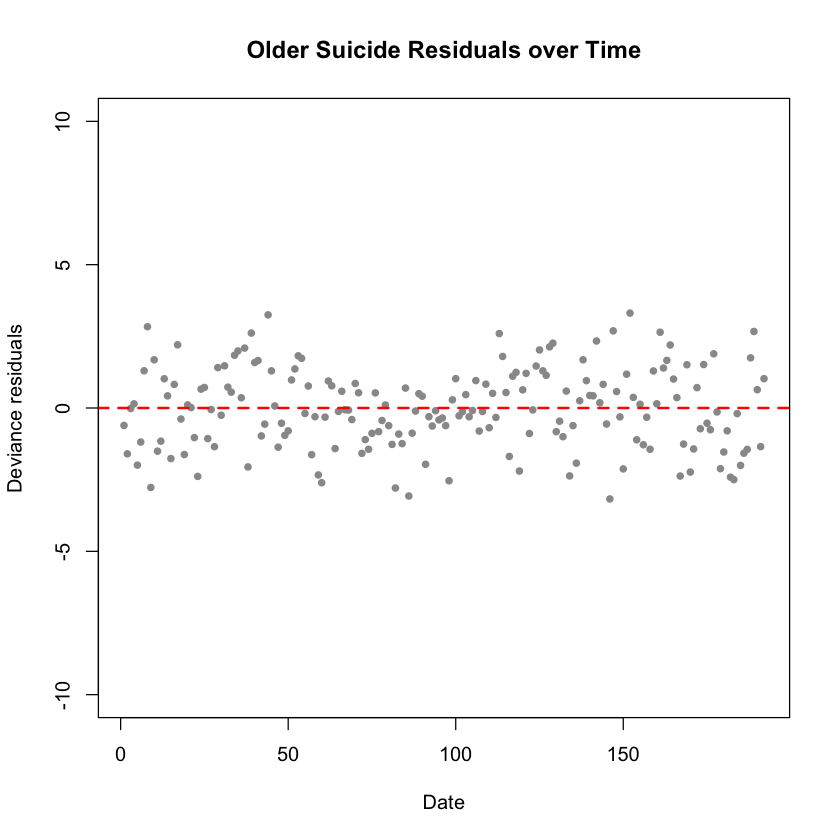


	Breusch-Godfrey test for serial correlation of order up to 1

data:  m.suic.male
LM test = 5.2528, df = 1, p-value = 0.02191



	Breusch-Godfrey test for serial correlation of order up to 12

data:  m.suic.male
LM test = 29.475, df = 12, p-value = 0.003348



	Breusch-Godfrey test for serial correlation of order up to 1

data:  sm.suic.male
LM test = 2.5138, df = 1, p-value = 0.1129



	Breusch-Godfrey test for serial correlation of order up to 12

data:  sm.suic.male
LM test = 22.17, df = 12, p-value = 0.03566


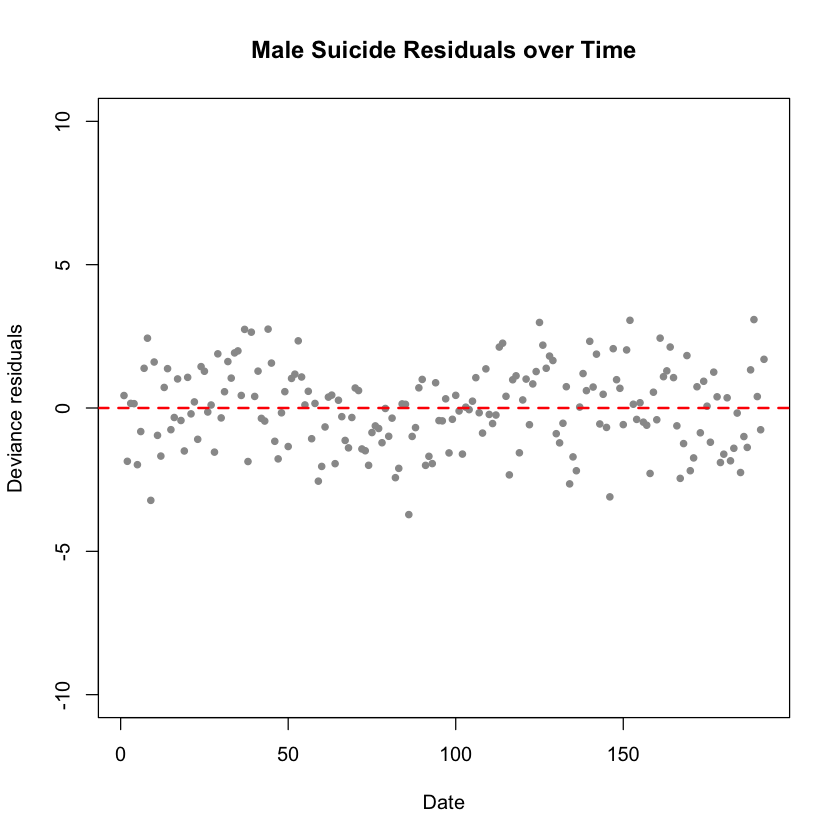


	Breusch-Godfrey test for serial correlation of order up to 1

data:  m.suic.female
LM test = 9.4584, df = 1, p-value = 0.002102



	Breusch-Godfrey test for serial correlation of order up to 12

data:  m.suic.female
LM test = 22.88, df = 12, p-value = 0.02876



	Breusch-Godfrey test for serial correlation of order up to 1

data:  sm.suic.female
LM test = 5.617, df = 1, p-value = 0.01779



	Breusch-Godfrey test for serial correlation of order up to 12

data:  sm.suic.female
LM test = 19.737, df = 12, p-value = 0.07222


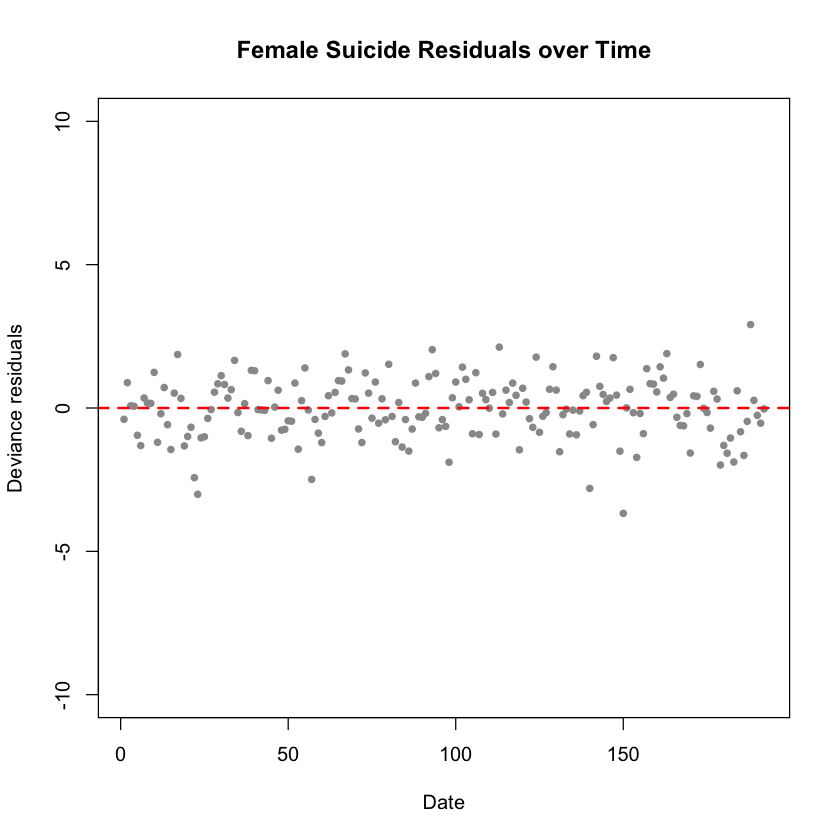

In [20]:
###  SUICIDE  ###

# WHITE #

## Non-Seasonal Model
m.suic.white <- glm(Deaths ~ offset(log(StdPop)) + After + Time, 
                   family=quasipoisson, data = suic.white)
# Residual plot
suic.white.res1 <- residuals(m.suic.white,type="deviance")

plot(suic.white$Time,suic.white.res1,ylim=c(-10,10),pch=19,cex=0.7,col=grey(0.6),
     main="White Suicide Residuals over Time",ylab="Deviance residuals",xlab="Date")
abline(h=0,lty=2,lwd=2, col = "red")

# Breusch-Godfrey test for autocorrelation
bgtest(m.suic.white)            # p < 0.05
bgtest(m.suic.white, order=12)  # p < 0.01

## Seasonal model
sm.suic.white <- glm(Deaths ~ offset(log(StdPop)) + After + Time + harmonic(MonthNo,2,12), 
                    family=quasipoisson, data = suic.white)

# Seasonal Breusch-Godfrey test for autocorrelation
bgtest(sm.suic.white)
bgtest(sm.suic.white, order=12)  # p < 0.05


# YOUNGER #

## Non-Seasonal Model
m.suic.20_34 <- glm(Deaths ~ offset(log(StdPop)) + After + Time, 
                   family=quasipoisson, data = suic.20_34)
# Residual plot
suic.20_34.res1 <- residuals(m.suic.20_34,type="deviance")

plot(suic.20_34$Time,suic.20_34.res1,ylim=c(-10,10),pch=19,cex=0.7,col=grey(0.6),
     main="Younger Suicide Residuals over Time",ylab="Deviance residuals",xlab="Date")
abline(h=0,lty=2,lwd=2, col = "red")

# Breusch-Godfrey test for autocorrelation
bgtest(m.suic.20_34)  
bgtest(m.suic.20_34, order=12)

## Seasonal model
sm.suic.20_34 <- glm(Deaths ~ offset(log(StdPop)) + After + Time + harmonic(MonthNo,2,12), 
                    family=quasipoisson, data = suic.20_34)

# Seasonal Breusch-Godfrey test for autocorrelation
bgtest(sm.suic.20_34)
bgtest(sm.suic.20_34, order=12)


# OLDER #

## Non-Seasonal Model
m.suic.35over <- glm(Deaths ~ offset(log(StdPop)) + After + Time, 
                    family=quasipoisson, data = suic.35over)
# Residual plot
suic.35over.res1 <- residuals(m.suic.35over,type="deviance")

plot(suic.35over$Time,suic.35over.res1,ylim=c(-10,10),pch=19,cex=0.7,col=grey(0.6),
     main="Older Suicide Residuals over Time",ylab="Deviance residuals",xlab="Date")
abline(h=0,lty=2,lwd=2, col = "red")

# Breusch-Godfrey test for autocorrelation
bgtest(m.suic.35over)            # p < 0.05
bgtest(m.suic.35over, order=12)  # p < 0.01

## Seasonal model
sm.suic.35over <- glm(Deaths ~ offset(log(StdPop)) + After + Time + harmonic(MonthNo,2,12), 
                     family=quasipoisson, data = suic.35over)

# Seasonal Breusch-Godfrey test for autocorrelation
bgtest(sm.suic.35over)
bgtest(sm.suic.35over, order=12)  # p = 0.06


# MALE #

## Non-Seasonal Model
m.suic.male <- glm(Deaths ~ offset(log(StdPop)) + After + Time, 
                  family=quasipoisson, data = suic.male)
# Residual plot
suic.male.res1 <- residuals(m.suic.male,type="deviance")

plot(suic.male$Time,suic.male.res1,ylim=c(-10,10),pch=19,cex=0.7,col=grey(0.6),
     main="Male Suicide Residuals over Time",ylab="Deviance residuals",xlab="Date")
abline(h=0,lty=2,lwd=2, col = "red")

# Breusch-Godfrey test for autocorrelation
bgtest(m.suic.male)            # p < 0.05  
bgtest(m.suic.male, order=12)  # p < 0.01

## Seasonal model
sm.suic.male <- glm(Deaths ~ offset(log(StdPop)) + After + Time + harmonic(MonthNo,2,12), 
                   family=quasipoisson, data = suic.male)

# Seasonal Breusch-Godfrey test for autocorrelation
bgtest(sm.suic.male)
bgtest(sm.suic.male, order=12)  # p < 0.05


# FEMALE #

## Non-Seasonal Model
m.suic.female <- glm(Deaths ~ offset(log(StdPop)) + After + Time, 
                    family=quasipoisson, data = suic.female)
# Residual plot
suic.female.res1 <- residuals(m.suic.female,type="deviance")

plot(suic.female$Time,suic.female.res1,ylim=c(-10,10),pch=19,cex=0.7,col=grey(0.6),
     main="Female Suicide Residuals over Time",ylab="Deviance residuals",xlab="Date")
abline(h=0,lty=2,lwd=2, col = "red")

# Breusch-Godfrey test for autocorrelation
bgtest(m.suic.female)            # p < 0.01
bgtest(m.suic.female, order=12)  # p < 0.05

## Seasonal model
sm.suic.female <- glm(Deaths ~ offset(log(StdPop)) + After + Time + harmonic(MonthNo,2,12), 
                     family=quasipoisson, data = suic.female)

# Seasonal Breusch-Godfrey test for autocorrelation
bgtest(sm.suic.female)            # p < 0.05
bgtest(sm.suic.female, order=12)



	Breusch-Godfrey test for serial correlation of order up to 1

data:  m.FAhom.white
LM test = 0.029248, df = 1, p-value = 0.8642



	Breusch-Godfrey test for serial correlation of order up to 12

data:  m.FAhom.white
LM test = 7.9313, df = 12, p-value = 0.7905



	Breusch-Godfrey test for serial correlation of order up to 1

data:  sm.FAhom.white
LM test = 0.00078746, df = 1, p-value = 0.9776



	Breusch-Godfrey test for serial correlation of order up to 12

data:  sm.FAhom.white
LM test = 8.1094, df = 12, p-value = 0.7765



	Breusch-Godfrey test for serial correlation of order up to 1

data:  m.FAhom.black
LM test = 5.084, df = 1, p-value = 0.02415



	Breusch-Godfrey test for serial correlation of order up to 12

data:  m.FAhom.black
LM test = 21.463, df = 12, p-value = 0.04399



	Breusch-Godfrey test for serial correlation of order up to 1

data:  sm.FAhom.black
LM test = 2.1096, df = 1, p-value = 0.1464



	Breusch-Godfrey test for serial correlation of order up to 12

data:  sm.FAhom.black
LM test = 22.087, df = 12, p-value = 0.03656



	Breusch-Godfrey test for serial correlation of order up to 1

data:  m.FAhom.20_34
LM test = 7.1729, df = 1, p-value = 0.007401



	Breusch-Godfrey test for serial correlation of order up to 12

data:  m.FAhom.20_34
LM test = 16.116, df = 12, p-value = 0.186



	Breusch-Godfrey test for serial correlation of order up to 1

data:  sm.FAhom.20_34
LM test = 5.6642, df = 1, p-value = 0.01731



	Breusch-Godfrey test for serial correlation of order up to 12

data:  sm.FAhom.20_34
LM test = 16.312, df = 12, p-value = 0.1774



	Breusch-Godfrey test for serial correlation of order up to 1

data:  m.FAhom.35over
LM test = 11.818, df = 1, p-value = 0.0005866



	Breusch-Godfrey test for serial correlation of order up to 12

data:  m.FAhom.35over
LM test = 21.154, df = 12, p-value = 0.04816



	Breusch-Godfrey test for serial correlation of order up to 1

data:  sm.FAhom.35over
LM test = 8.3226, df = 1, p-value = 0.003915



	Breusch-Godfrey test for serial correlation of order up to 12

data:  sm.FAhom.35over
LM test = 17.781, df = 12, p-value = 0.1225


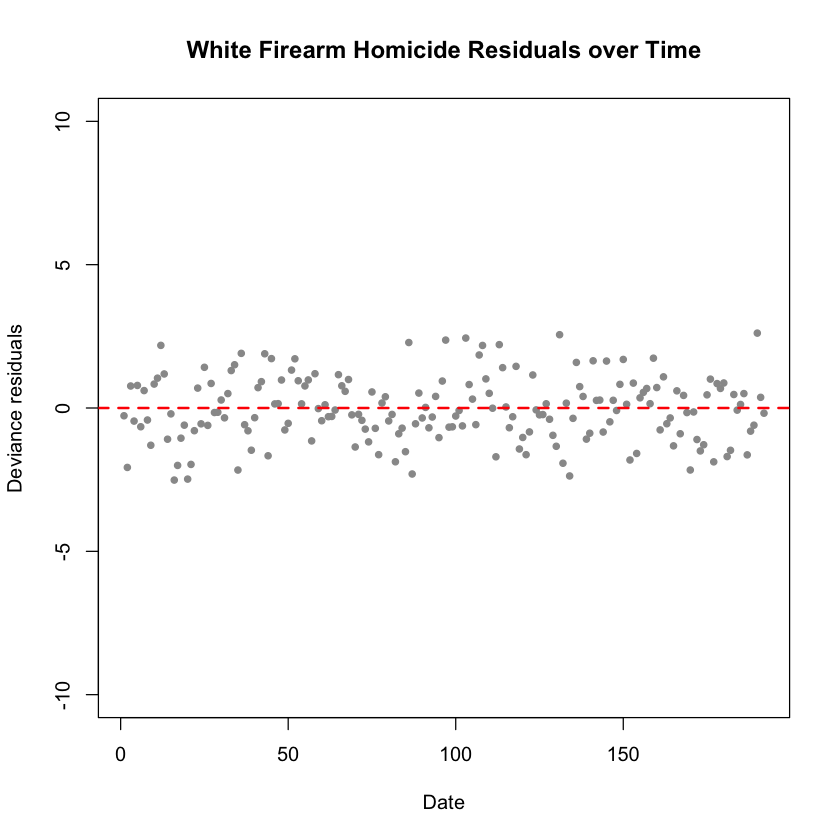


	Breusch-Godfrey test for serial correlation of order up to 1

data:  m.FAhom.male
LM test = 10.554, df = 1, p-value = 0.00116



	Breusch-Godfrey test for serial correlation of order up to 12

data:  m.FAhom.male
LM test = 20.695, df = 12, p-value = 0.05503



	Breusch-Godfrey test for serial correlation of order up to 1

data:  sm.FAhom.male
LM test = 7.2334, df = 1, p-value = 0.007156



	Breusch-Godfrey test for serial correlation of order up to 12

data:  sm.FAhom.male
LM test = 23.586, df = 12, p-value = 0.02314


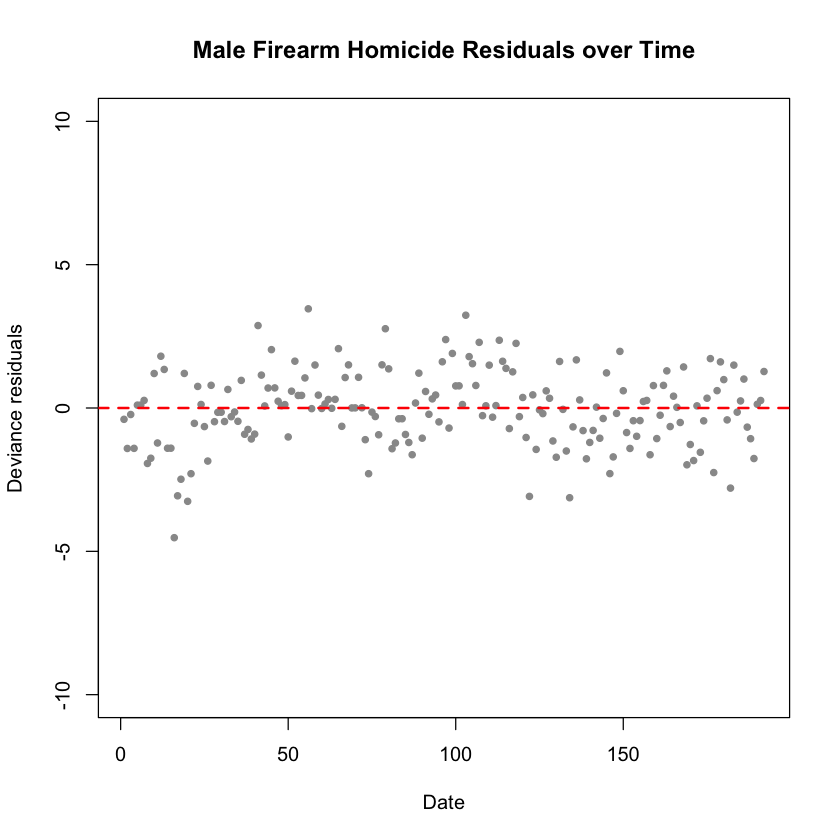

In [21]:
###  FIREARM HOMICIDE  ###

# WHITE #

## Non-Seasonal Model
m.FAhom.white <- glm(Deaths ~ offset(log(StdPop)) + After + Time, 
                   family=quasipoisson, data = FAhom.white)
# Residual plot
FAhom.white.res1 <- residuals(m.FAhom.white,type="deviance")

plot(FAhom.white$Time,FAhom.white.res1,ylim=c(-10,10),pch=19,cex=0.7,col=grey(0.6),
     main="White Firearm Homicide Residuals over Time",ylab="Deviance residuals",xlab="Date")
abline(h=0,lty=2,lwd=2, col = "red")

# Breusch-Godfrey test for autocorrelation
bgtest(m.FAhom.white)
bgtest(m.FAhom.white, order=12)

## Seasonal model
sm.FAhom.white <- glm(Deaths ~ offset(log(StdPop)) + After + Time + harmonic(MonthNo,2,12), 
                    family=quasipoisson, data = FAhom.white)

# Seasonal Breusch-Godfrey test for autocorrelation
bgtest(sm.FAhom.white)
bgtest(sm.FAhom.white, order=12)


# BLACK #

## Non-Seasonal Model
m.FAhom.black <- glm(Deaths ~ offset(log(StdPop)) + After + Time, 
                   family=quasipoisson, data = FAhom.black)

# Breusch-Godfrey test for autocorrelation
bgtest(m.FAhom.black)             # p < 0.05
bgtest(m.FAhom.black, order=12)

## Seasonal model
sm.FAhom.black <- glm(Deaths ~ offset(log(StdPop)) + After + Time + harmonic(MonthNo,2,12), 
                    family=quasipoisson, data = FAhom.black)

# Seasonal Breusch-Godfrey test for autocorrelation
bgtest(sm.FAhom.black)
bgtest(sm.FAhom.black, order=12)


# YOUNGER #

## Non-Seasonal Model
m.FAhom.20_34 <- glm(Deaths ~ offset(log(StdPop)) + After + Time, 
                   family=quasipoisson, data = FAhom.20_34)

# Breusch-Godfrey test for autocorrelation
bgtest(m.FAhom.20_34)             # p < 0.05
bgtest(m.FAhom.20_34, order=12)

## Seasonal model
sm.FAhom.20_34 <- glm(Deaths ~ offset(log(StdPop)) + After + Time + harmonic(MonthNo,2,12), 
                    family=quasipoisson, data = FAhom.20_34)

# Seasonal Breusch-Godfrey test for autocorrelation
bgtest(sm.FAhom.20_34)            # p < 0.05
bgtest(sm.FAhom.20_34, order=12)


# OLDER #

## Non-Seasonal Model
m.FAhom.35over <- glm(Deaths ~ offset(log(StdPop)) + After + Time, 
                    family=quasipoisson, data = FAhom.35over)

# Breusch-Godfrey test for autocorrelation
bgtest(m.FAhom.35over)            # p < 0.001
bgtest(m.FAhom.35over, order=12)

## Seasonal model
sm.FAhom.35over <- glm(Deaths ~ offset(log(StdPop)) + After + Time + harmonic(MonthNo,2,12), 
                     family=quasipoisson, data = FAhom.35over)

# Seasonal Breusch-Godfrey test for autocorrelation
bgtest(sm.FAhom.35over)           # p < 0.001
bgtest(sm.FAhom.35over, order=12)


# MALE #

## Non-Seasonal Model
m.FAhom.male <- glm(Deaths ~ offset(log(StdPop)) + After + Time, 
                  family=quasipoisson, data = FAhom.male)
# Residual plot
FAhom.male.res1 <- residuals(m.FAhom.male,type="deviance")

plot(FAhom.male$Time,FAhom.male.res1,ylim=c(-10,10),pch=19,cex=0.7,col=grey(0.6),
     main="Male Firearm Homicide Residuals over Time",ylab="Deviance residuals",xlab="Date")
abline(h=0,lty=2,lwd=2, col = "red")

# Breusch-Godfrey test for autocorrelation
bgtest(m.FAhom.male)            # p < 0.01  
bgtest(m.FAhom.male, order=12)  # p ~ 0.05

## Seasonal model
sm.FAhom.male <- glm(Deaths ~ offset(log(StdPop)) + After + Time + harmonic(MonthNo,2,12), 
                   family=quasipoisson, data = FAhom.male)

# Seasonal Breusch-Godfrey test for autocorrelation
bgtest(sm.FAhom.male)            # p < 0.01
bgtest(sm.FAhom.male, order=12)  # p < 0.05




	Breusch-Godfrey test for serial correlation of order up to 1

data:  m.FAsuic.white
LM test = 2.2788, df = 1, p-value = 0.1312



	Breusch-Godfrey test for serial correlation of order up to 12

data:  m.FAsuic.white
LM test = 16.918, df = 12, p-value = 0.1527



	Breusch-Godfrey test for serial correlation of order up to 1

data:  sm.FAsuic.white
LM test = 0.95553, df = 1, p-value = 0.3283



	Breusch-Godfrey test for serial correlation of order up to 12

data:  sm.FAsuic.white
LM test = 13.952, df = 12, p-value = 0.3038



	Breusch-Godfrey test for serial correlation of order up to 1

data:  m.FAsuic.20_34
LM test = 0.52122, df = 1, p-value = 0.4703



	Breusch-Godfrey test for serial correlation of order up to 12

data:  m.FAsuic.20_34
LM test = 3.8813, df = 12, p-value = 0.9855



	Breusch-Godfrey test for serial correlation of order up to 1

data:  sm.FAsuic.20_34
LM test = 1.3464, df = 1, p-value = 0.2459



	Breusch-Godfrey test for serial correlation of order up to 12

data:  sm.FAsuic.20_34
LM test = 7.0111, df = 12, p-value = 0.8569


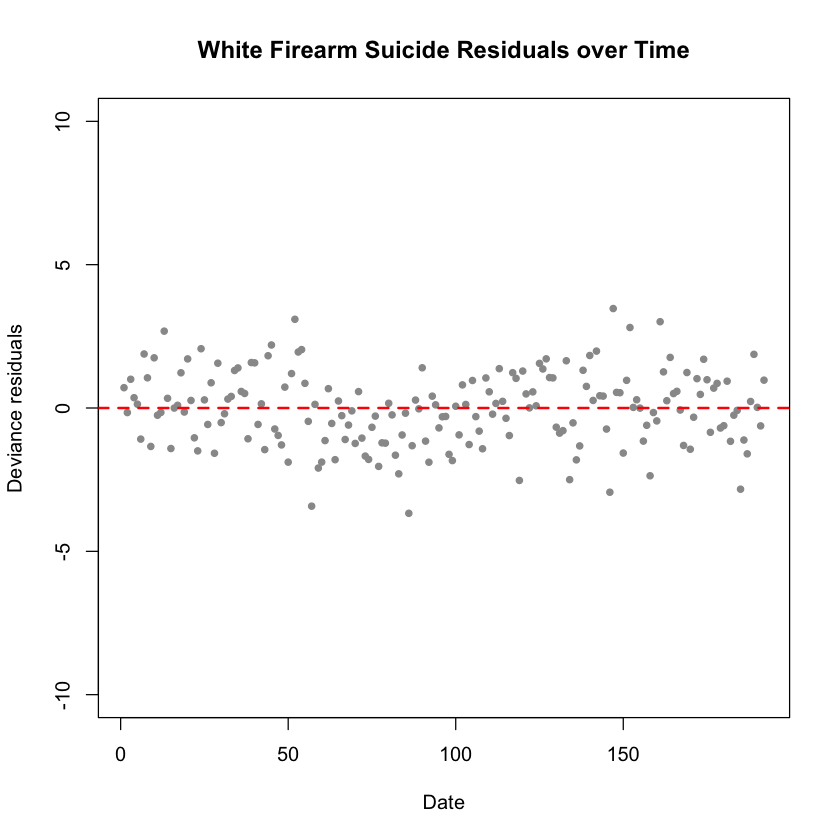


	Breusch-Godfrey test for serial correlation of order up to 1

data:  m.FAsuic.35over
LM test = 2.3045, df = 1, p-value = 0.129



	Breusch-Godfrey test for serial correlation of order up to 12

data:  m.FAsuic.35over
LM test = 24.712, df = 12, p-value = 0.01625



	Breusch-Godfrey test for serial correlation of order up to 1

data:  sm.FAsuic.35over
LM test = 0.65097, df = 1, p-value = 0.4198



	Breusch-Godfrey test for serial correlation of order up to 12

data:  sm.FAsuic.35over
LM test = 18.994, df = 12, p-value = 0.08866


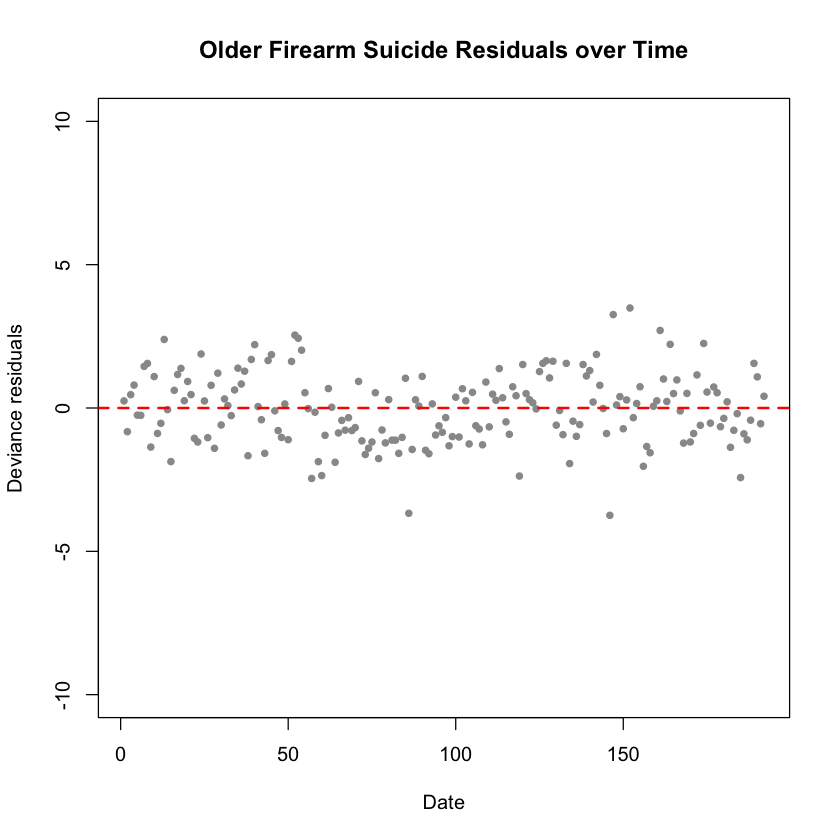


	Breusch-Godfrey test for serial correlation of order up to 1

data:  m.FAsuic.male
LM test = 2.554, df = 1, p-value = 0.11



	Breusch-Godfrey test for serial correlation of order up to 12

data:  m.FAsuic.male
LM test = 19.643, df = 12, p-value = 0.07415



	Breusch-Godfrey test for serial correlation of order up to 1

data:  sm.FAsuic.male
LM test = 1.5288, df = 1, p-value = 0.2163



	Breusch-Godfrey test for serial correlation of order up to 12

data:  sm.FAsuic.male
LM test = 17.551, df = 12, p-value = 0.13



	Breusch-Godfrey test for serial correlation of order up to 1

data:  m.FAsuic.female
LM test = 7.4462, df = 1, p-value = 0.006357



	Breusch-Godfrey test for serial correlation of order up to 12

data:  m.FAsuic.female
LM test = 29.673, df = 12, p-value = 0.003127



	Breusch-Godfrey test for serial correlation of order up to 1

data:  sm.FAsuic.female
LM test = 3.0998, df = 1, p-value = 0.0783



	Breusch-Godfrey test for serial correlation of order up to 12

data:  sm.FAsuic.female
LM test = 20.826, df = 12, p-value = 0.05299


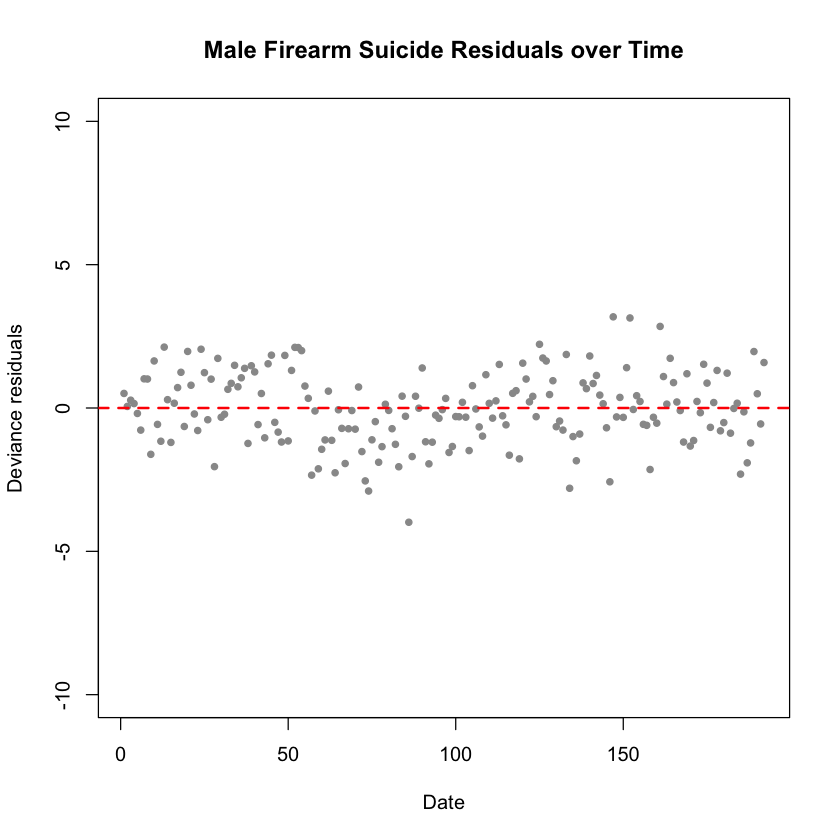

In [22]:
###  FIREARM SUICIDE  ###

# WHITE #

## Non-Seasonal Model
m.FAsuic.white <- glm(Deaths ~ offset(log(StdPop)) + After + Time, 
                    family=quasipoisson, data = FAsuic.white)
# Residual plot
FAsuic.white.res1 <- residuals(m.FAsuic.white,type="deviance")

plot(FAsuic.white$Time,FAsuic.white.res1,ylim=c(-10,10),pch=19,cex=0.7,col=grey(0.6),
     main="White Firearm Suicide Residuals over Time",ylab="Deviance residuals",xlab="Date")
abline(h=0,lty=2,lwd=2, col = "red")

# Breusch-Godfrey test for autocorrelation
bgtest(m.FAsuic.white)            
bgtest(m.FAsuic.white, order=12)  

## Seasonal model
sm.FAsuic.white <- glm(Deaths ~ offset(log(StdPop)) + After + Time + harmonic(MonthNo,2,12), 
                     family=quasipoisson, data = FAsuic.white)

# Seasonal Breusch-Godfrey test for autocorrelation
bgtest(sm.FAsuic.white)
bgtest(sm.FAsuic.white, order=12)


# YOUNGER #

## Non-Seasonal Model
m.FAsuic.20_34 <- glm(Deaths ~ offset(log(StdPop)) + After + Time, 
                    family=quasipoisson, data = FAsuic.20_34)

# Breusch-Godfrey test for autocorrelation
bgtest(m.FAsuic.20_34)
bgtest(m.FAsuic.20_34, order=12)

## Seasonal model
sm.FAsuic.20_34 <- glm(Deaths ~ offset(log(StdPop)) + After + Time + harmonic(MonthNo,2,12), 
                     family=quasipoisson, data = FAsuic.20_34)

# Seasonal Breusch-Godfrey test for autocorrelation
bgtest(sm.FAsuic.20_34)
bgtest(sm.FAsuic.20_34, order=12)


# OLDER #

## Non-Seasonal Model
m.FAsuic.35over <- glm(Deaths ~ offset(log(StdPop)) + After + Time, 
                     family=quasipoisson, data = FAsuic.35over)
# Residual plot
FAsuic.35over.res1 <- residuals(m.FAsuic.35over,type="deviance")

plot(FAsuic.35over$Time,FAsuic.35over.res1,ylim=c(-10,10),pch=19,cex=0.7,col=grey(0.6),
     main="Older Firearm Suicide Residuals over Time",ylab="Deviance residuals",xlab="Date")
abline(h=0,lty=2,lwd=2, col = "red")

# Breusch-Godfrey test for autocorrelation
bgtest(m.FAsuic.35over)           
bgtest(m.FAsuic.35over, order=12)  # p < 0.05

## Seasonal model
sm.FAsuic.35over <- glm(Deaths ~ offset(log(StdPop)) + After + Time + harmonic(MonthNo,2,12), 
                      family=quasipoisson, data = FAsuic.35over)

# Seasonal Breusch-Godfrey test for autocorrelation
bgtest(sm.FAsuic.35over)
bgtest(sm.FAsuic.35over, order=12)  # p = 0.088


# MALE #

## Non-Seasonal Model
m.FAsuic.male <- glm(Deaths ~ offset(log(StdPop)) + After + Time, 
                   family=quasipoisson, data = FAsuic.male)
# Residual plot
FAsuic.male.res1 <- residuals(m.FAsuic.male,type="deviance")

plot(FAsuic.male$Time,FAsuic.male.res1,ylim=c(-10,10),pch=19,cex=0.7,col=grey(0.6),
     main="Male Firearm Suicide Residuals over Time",ylab="Deviance residuals",xlab="Date")
abline(h=0,lty=2,lwd=2, col = "red")

# Breusch-Godfrey test for autocorrelation
bgtest(m.FAsuic.male)            
bgtest(m.FAsuic.male, order=12)  # p = 0.07

## Seasonal model
sm.FAsuic.male <- glm(Deaths ~ offset(log(StdPop)) + After + Time + harmonic(MonthNo,2,12), 
                    family=quasipoisson, data = FAsuic.male)

# Seasonal Breusch-Godfrey test for autocorrelation
bgtest(sm.FAsuic.male)
bgtest(sm.FAsuic.male, order=12) 


# FEMALE #

## Non-Seasonal Model
m.FAsuic.female <- glm(Deaths ~ offset(log(StdPop)) + After + Time, 
                     family=quasipoisson, data = FAsuic.female)

# Breusch-Godfrey test for autocorrelation
bgtest(m.FAsuic.female)            # p < 0.005
bgtest(m.FAsuic.female, order=12)  # p < 0.05

## Seasonal model
sm.FAsuic.female <- glm(Deaths ~ offset(log(StdPop)) + After + Time + harmonic(MonthNo,2,12), 
                      family=quasipoisson, data = FAsuic.female)

# Seasonal Breusch-Godfrey test for autocorrelation
bgtest(sm.FAsuic.female)            # p < 0.05
bgtest(sm.FAsuic.female, order=12)

In [23]:
############################
##  Relative Risk 95% CI  ##
############################

###  HOMICIDE  ###
# Breusch-Godrey tests did not indicate statistically significant autocorrelation
# so, we calculate and report normal standard errors for seasonal models of homicide

round(ci.lin(sm.hom.white,Exp=T)["After",5:7],2)
summary(sm.hom.white,Exp=T)$coefficients["After",4]

round(ci.lin(sm.hom.black,Exp=T)["After",5:7],2)
summary(sm.hom.black,Exp=T)$coefficients["After",4]

round(ci.lin(sm.hom.20_34,Exp=T)["After",5:7],2)
summary(sm.hom.20_34,Exp=T)$coefficients["After",4]

round(ci.lin(sm.hom.35over,Exp=T)["After",5:7],2)
summary(sm.hom.35over,Exp=T)$coefficients["After",4]

round(ci.lin(sm.hom.male,Exp=T)["After",5:7],2)
summary(sm.hom.male,Exp=T)$coefficients["After",4]

round(ci.lin(sm.hom.female,Exp=T)["After",5:7],2)
summary(sm.hom.female,Exp=T)$coefficients["After",4]


###  SUICIDE  ###
# Breusch-Godrey tests indicated statistically significant autocorrelation
# for white, older, male and female

# Robust standard errors calculated for the seasonal model
coef <- coef(sm.suic.white )["After"]
se <- sqrt(vcovHAC(sm.suic.white )["After","After"])
round(c(RR=exp(coef),ll=exp(coef-qnorm(0.975)*se),ul=exp(coef+qnorm(0.975)*se)),2)
summary(sm.suic.white,Exp=T)$coefficients["After",4]

round(ci.lin(m.suic.20_34,Exp=T)["After",5:7],2)
summary(m.suic.20_34,Exp=T)$coefficients["After",4]

# Robust standard errors calculated for the seasonal model
coef <- coef(sm.suic.35over )["After"]
se <- sqrt(vcovHAC(sm.suic.35over )["After","After"])
round(c(RR=exp(coef),ll=exp(coef-qnorm(0.975)*se),ul=exp(coef+qnorm(0.975)*se)),2)
summary(sm.suic.35over,Exp=T)$coefficients["After",4]

# Robust standard errors calculated for the seasonal model
coef <- coef(sm.suic.male )["After"]
se <- sqrt(vcovHAC(sm.suic.male )["After","After"])
round(c(RR=exp(coef),ll=exp(coef-qnorm(0.975)*se),ul=exp(coef+qnorm(0.975)*se)),2)
summary(sm.suic.male,Exp=T)$coefficients["After",4]

# Robust standard errors calculated for the seasonal model
coef <- coef(sm.suic.female )["After"]
se <- sqrt(vcovHAC(sm.suic.female )["After","After"])
round(c(RR=exp(coef),ll=exp(coef-qnorm(0.975)*se),ul=exp(coef+qnorm(0.975)*se)),2)
summary(sm.suic.female,Exp=T)$coefficients["After",4]


###  FIREARM HOMICIDE  ###
# Breusch-Godrey tests indicated statistically significant autocorrelation
# for younger, older and male

round(ci.lin(sm.FAhom.white,Exp=T)["After",5:7],2)
summary(sm.FAhom.white,Exp=T)$coefficients["After",4]

# Robust standard errors calculated for the seasonal model
coef <- coef(sm.FAhom.black )["After"]
se <- sqrt(vcovHAC(sm.FAhom.black )["After","After"])
round(c(RR=exp(coef),ll=exp(coef-qnorm(0.975)*se),ul=exp(coef+qnorm(0.975)*se)),3)
summary(sm.FAhom.black,Exp=T)$coefficients["After",4]

round(ci.lin(m.FAhom.20_34,Exp=T)["After",5:7],2)  # this gets closest to the numbers in the paper
summary(m.FAhom.20_34,Exp=T)$coefficients["After",4]

# Robust standard errors calculated for the seasonal model
coef <- coef(sm.FAhom.35over )["After"]
se <- sqrt(vcovHAC(sm.FAhom.35over )["After","After"])
round(c(RR=exp(coef),ll=exp(coef-qnorm(0.975)*se),ul=exp(coef+qnorm(0.975)*se)),2)
summary(sm.FAhom.35over,Exp=T)$coefficients["After",4]

# Robust standard errors calculated for the seasonal model
coef <- coef(sm.FAhom.male )["After"]
se <- sqrt(vcovHAC(sm.FAhom.male )["After","After"])
round(c(RR=exp(coef),ll=exp(coef-qnorm(0.975)*se),ul=exp(coef+qnorm(0.975)*se)),2)
summary(sm.FAhom.male,Exp=T)$coefficients["After",4]


###  FIREARM SUICIDE  ###
# Breusch-Godrey tests indicated statistically significant autocorrelation
# for older and female, however, the confidence intervals reported in the 
# paper appear to use normal standard errors

round(ci.lin(m.FAsuic.white,Exp=T)["After",5:7],2)
summary(m.FAsuic.white,Exp=T)$coefficients["After",4]

round(ci.lin(m.FAsuic.20_34,Exp=T)["After",5:7],2)
summary(m.FAsuic.20_34,Exp=T)$coefficients["After",4]

round(ci.lin(sm.FAsuic.35over,Exp=T)["After",5:7],2) #this produces the exact numbers from the paper
summary(sm.FAsuic.35over,Exp=T)$coefficients["After",4]

round(ci.lin(sm.FAsuic.male,Exp=T)["After",5:7],2)
summary(sm.FAsuic.male,Exp=T)$coefficients["After",4]

round(ci.lin(sm.FAsuic.female,Exp=T)["After",5:7],2) #this produces the exact numbers from the paper
summary(sm.FAsuic.female,Exp=T)$coefficients["After",4]

# Robust standard errors calculated for the seasonal model
coef <- coef(sm.FAsuic.35over )["After"]
se <- sqrt(vcovHAC(sm.FAsuic.35over )["After","After"])
round(c(RR=exp(coef),ll=exp(coef-qnorm(0.975)*se),ul=exp(coef+qnorm(0.975)*se)),2)
summary(sm.FAsuic.35over,Exp=T)$coefficients["After",4]

# Robust standard errors calculated for the seasonal model
coef <- coef(sm.FAsuic.female )["After"]
se <- sqrt(vcovHAC(sm.FAsuic.female )["After","After"])
round(c(RR=exp(coef),ll=exp(coef-qnorm(0.975)*se),ul=exp(coef+qnorm(0.975)*se)),2)
summary(sm.FAsuic.female,Exp=T)$coefficients["After",4]


exp(Est.)      2.5%     97.5% 
     1.29      1.17      1.42

[1] 2.876117e-07

exp(Est.)      2.5%     97.5% 
     1.20      1.09      1.31

[1] 0.0001991668

exp(Est.)      2.5%     97.5% 
     1.34      1.22      1.48

[1] 1.828421e-08

exp(Est.)      2.5%     97.5% 
     1.14      1.04      1.25

[1] 0.00517943

exp(Est.)      2.5%     97.5% 
     1.28      1.18      1.38

[1] 2.837457e-09

exp(Est.)      2.5%     97.5% 
     1.13      1.00      1.28

[1] 0.04879574

RR.After ll.After ul.After 
    0.99     0.94     1.05

[1] 0.8165215

exp(Est.)      2.5%     97.5% 
     1.00      0.92      1.09

[1] 0.9915145

RR.After ll.After ul.After 
    1.01     0.95     1.07

[1] 0.7529624

RR.After ll.After ul.After 
    1.01     0.95     1.09

[1] 0.6258312

RR.After ll.After ul.After 
    0.92     0.85     0.99

[1] 0.03007317

exp(Est.)      2.5%     97.5% 
     1.45      1.29      1.64

[1] 4.247223e-09

RR.After ll.After ul.After 
   1.223    1.084    1.380

[1] 0.0006050628

exp(Est.)      2.5%     97.5% 
     1.38      1.23      1.55

[1] 9.156356e-08

RR.After ll.After ul.After 
    1.19     1.02     1.38

[1] 0.007237629

RR.After ll.After ul.After 
    1.32     1.19     1.46

[1] 1.472602e-07

exp(Est.)      2.5%     97.5% 
     0.98      0.91      1.05

[1] 0.500368

exp(Est.)      2.5%     97.5% 
     1.02      0.89      1.17

[1] 0.7516404

exp(Est.)      2.5%     97.5% 
     0.98      0.91      1.05

[1] 0.6151986

exp(Est.)      2.5%     97.5% 
     0.99      0.92      1.07

[1] 0.8577183

exp(Est.)      2.5%     97.5% 
     0.88      0.78      1.00

[1] 0.05805169

RR.After ll.After ul.After 
    0.98     0.91     1.06

[1] 0.6151986

RR.After ll.After ul.After 
    0.88     0.77     1.01

[1] 0.05805169

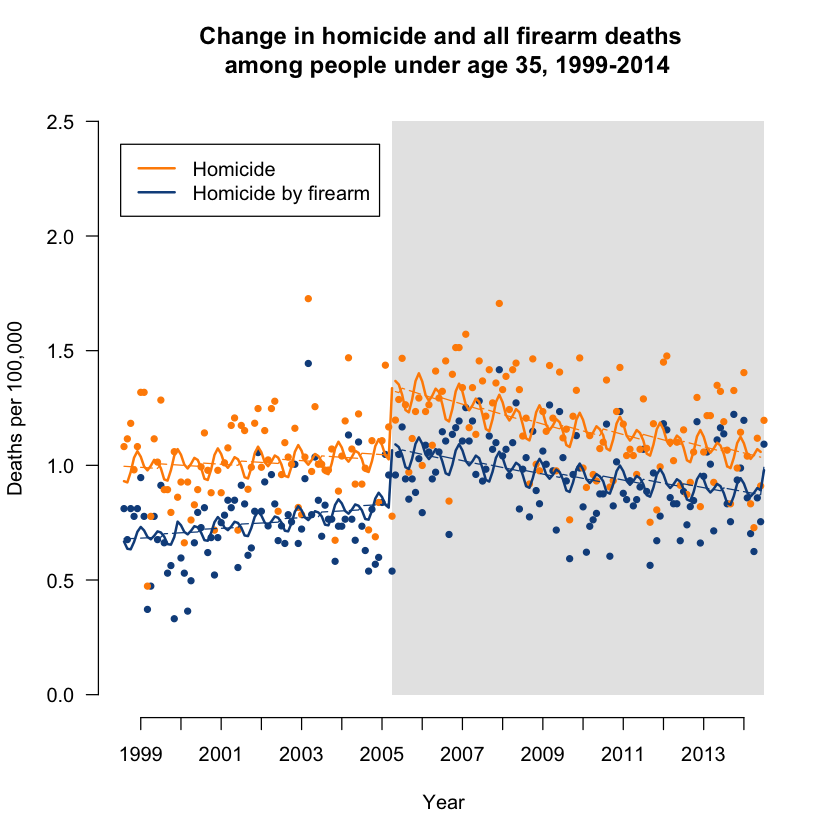

In [25]:
###############
##  FIGURES  ##
###############

###  Figure 2.A ###

# Data Set-Up
young <- subset(repdata, Characteristic == "20-34" & Cause == "Homicide" & Year < 2015| 
                  Characteristic == "20-34" & Cause == "Firearm Homicide" & Year < 2015)

# Setup variables
young$StdPop <- young$Population / 100000
young$Rate <- young$Deaths / young$StdPop
young$time <- rep(c(1:192), 2)
young$level <- c(rep(0,81),rep(1,111),rep(0,81),rep(1,111))
young$trend <- c(rep(0,81),1:111,rep(0,81),1:111)
young$firearms <- c(rep(1, 192), rep(0, 192))
young$FAtime <- young$firearms * young$time
young$FAlevel <- young$firearms * young$level
young$FAtrend <- young$firearms * young$trend

young_crappy <- glm(Rate ~ offset(log(StdPop)) + level + time + 
                      harmonic(MonthNo,2,12), family=quasipoisson, data=young)
young.mod <- with(young, Deaths/StdPop)
young.datanew <- data.frame(StdPop=mean(young$StdPop),level=rep(c(0,1),c(819,1101)),
                            time= 1:1920/10, MonthNo=rep(1:120/10,16))
young.crappy.pred1 <- predict(young_crappy,type="response",young.datanew)/mean(young$StdPop)
young.crappy.pred2 <- predict(young_crappy,type="response",transform(young.datanew,MonthNo=4.8))/mean(young$StdPop)

young_linear <- glm(Rate ~ offset(log(StdPop)) + time + firearms + FAtime + level + trend + FAlevel + FAtrend, 
                    family=quasipoisson, data=young)
young_harmonic <- glm(Rate ~ offset(log(StdPop)) + time + firearms + FAtime + level + trend + FAlevel + FAtrend + 
                        harmonic(MonthNo,2,12), family=quasipoisson, data=young)

#pdf("RFig2A_HomvFAHomYoung.pdf")
plot(young$time[1:192],young.mod[1:192],
     type="n",
     ylim=c(0,2.5),
     frame.plot=F,
     ylab="Deaths per 100,000",
     xlab="Year",
     xaxt="n",
     las=2)
axis(1,at=0:15*12+6,tick=T,labels=1999:2014) 
rect(81,0,192,2.5, col=grey(0.9),border=F)
points(young$time[1:192],young.mod[1:192],
       col="dodgerblue4",
       pch=20)
points(young$time[193:384],young.mod[193:384],
       col="darkorange",
       pch=20)
lines(young$time[1:81], fitted(young_linear)[1:81], col="dodgerblue4",lty=5)
lines(young$time[1:81], fitted(young_harmonic)[1:81], col="dodgerblue4",lwd=2)
lines(young$time[82:192], fitted(young_linear)[82:192], col="dodgerblue4",lty=5)
lines(young$time[82:192], fitted(young_harmonic)[82:192], col="dodgerblue4",lwd=2)
lines(young$time[193:273], fitted(young_linear)[193:273], col="darkorange",lty=5)
lines(young$time[193:273], fitted(young_harmonic)[193:273], col="darkorange",lwd=2)
lines(young$time[274:384], fitted(young_linear)[274:384], col="darkorange",lty=5)
lines(young$time[274:384], fitted(young_harmonic)[274:384], col="darkorange",lwd=2)
legend(x=0, y=2.4, legend=c("Homicide","Homicide by firearm"), col=c("darkorange","dodgerblue4"),lwd = 2)
title(main="Change in homicide and all firearm deaths \n among people under age 35, 1999-2014")
graphics.off()

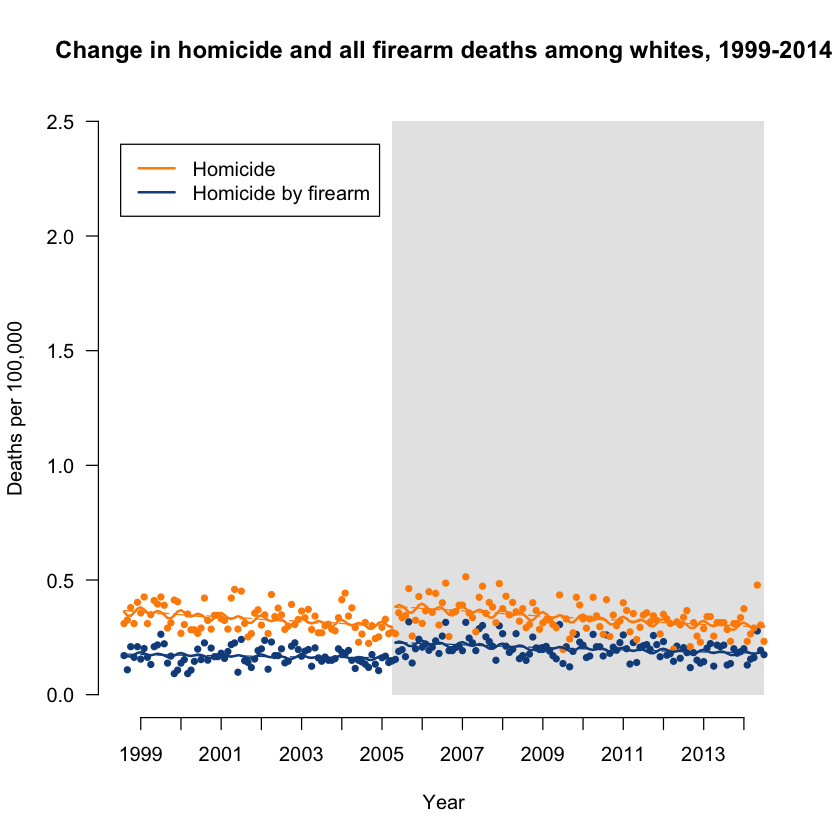

In [26]:
###  Figure 2.A ###

# Data Set-Up
white <- subset(repdata, Characteristic == "White" & Cause == "Homicide" & Year < 2015| 
                  Characteristic == "White" & Cause == "Firearm Homicide" & Year < 2015)

# Setup variables
white$StdPop <- white$Population / 100000
white$Rate <- white$Deaths / white$StdPop
white$time <- rep(c(1:192), 2)
white$level <- c(rep(0,81),rep(1,111),rep(0,81),rep(1,111))
white$trend <- c(rep(0,81),1:111,rep(0,81),1:111)
white$firearms <- c(rep(1, 192), rep(0, 192))
white$FAtime <- white$firearms * white$time
white$FAlevel <- white$firearms * white$level
white$FAtrend <- white$firearms * white$trend

white_crappy <- glm(Rate ~ offset(log(StdPop)) + level + time + 
                      harmonic(MonthNo,2,12), family=quasipoisson, data=white)
white.mod <- with(white, Deaths/StdPop)
white.datanew <- data.frame(StdPop=mean(white$StdPop),level=rep(c(0,1),c(819,1101)),
                            time= 1:1920/10, MonthNo=rep(1:120/10,16))
white.crappy.pred1 <- predict(young_crappy,type="response",white.datanew)/mean(white$StdPop)
white.crappy.pred2 <- predict(young_crappy,type="response",transform(white.datanew,MonthNo=4.8))/mean(white$StdPop)

white_linear <- glm(Rate ~ offset(log(StdPop)) + time + firearms + FAtime + level + trend + FAlevel + FAtrend, 
                    family=quasipoisson, data=white)
white_harmonic <- glm(Rate ~ offset(log(StdPop)) + time + firearms + FAtime + level + trend + FAlevel + FAtrend + 
                        harmonic(MonthNo,2,12), family=quasipoisson, data=white)

#pdf("RFig2B_HomvFAHomWhite.pdf")
plot(white$time[1:192],white.mod[1:192],
     type="n",
     ylim=c(0,2.5),
     frame.plot=F,
     ylab="Deaths per 100,000",
     xlab="Year",
     xaxt="n",
     las=2)
axis(1,at=0:15*12+6,tick=T,labels=1999:2014) 
rect(81,0,192,2.5, col=grey(0.9),border=F)
points(white$time[1:192],white.mod[1:192],
       col="dodgerblue4",
       pch=20)
points(white$time[193:384],white.mod[193:384],
       col="darkorange",
       pch=20)
lines(white$time[1:81], fitted(white_linear)[1:81], col="dodgerblue4",lty=5)
lines(white$time[1:81], fitted(white_harmonic)[1:81], col="dodgerblue4",lwd=2)
lines(white$time[82:192], fitted(white_linear)[82:192], col="dodgerblue4",lty=5)
lines(white$time[82:192], fitted(white_harmonic)[82:192], col="dodgerblue4",lwd=2)
lines(white$time[193:273], fitted(white_linear)[193:273], col="darkorange",lty=5)
lines(white$time[193:273], fitted(white_harmonic)[193:273], col="darkorange",lwd=2)
lines(white$time[274:384], fitted(white_linear)[274:384], col="darkorange",lty=5)
lines(white$time[274:384], fitted(white_harmonic)[274:384], col="darkorange",lwd=2)
legend(x=0, y=2.4, legend=c("Homicide","Homicide by firearm"), col=c("darkorange","dodgerblue4"),lwd = 2)
title(main="Change in homicide and all firearm deaths among whites, 1999-2014")
graphics.off()


In [27]:
# Subsets
FallHom2016 <- subset(allhom, Treatment ==1)
CSallHom2016 <- subset(allhom, Treatment ==0) 
FFireHom2016 <- subset(firehom, Treatment ==1)
CSFireHom2016 <- subset(firehom, Treatment ==0) 
Florida.Sui2016 <- subset(allsuicides, Treatment ==1)
CS.Sui2016 <- subset(allsuicides, Treatment ==0)
FFASuic2016 <- subset(FASuic, Treatment ==1)
CSFASuic2016 <- subset(FASuic, Treatment ==0)

# NEW DATA - (Combo) ALL Firearm Related Deaths 
firecombo <- subset(alldata, Cause=="Combo")
FCombo2016 <- subset(firecombo, Treatment ==1)
CSCombo2016 <- subset(firecombo, Treatment ==0)

############################################
###     MEAN AND RATE MONTHLY COUNTS     ###
############################################

##2016 Homicide 
mean(FallHom2016$Deaths[FallHom2016$Effective==1]) ##Florida after
mean(CSallHom2016$Deaths[CSallHom2016$Effective==1]) ##Control States after
mean(FallHom2016$Rate[FallHom2016$Effective==1]) #Florida After
mean(CSallHom2016$Rate[CSallHom2016$Effective==1]) ##Control States after

##2016 - Firearm Homicide 
mean(FFireHom2016$Deaths[FFireHom2016$Effective==1]) ##Florida after
mean(CSFireHom2016$Deaths[CSFireHom2016$Effective==1]) ##Control States after
mean(FFireHom2016$Rate[FFireHom2016$Effective==1]) # Florida After
mean(CSFireHom2016$Rate[CSFireHom2016$Effective==1]) ##Control States after

##2016 - All Suicide
mean(Florida.Sui2016$Deaths[Florida.Sui2016$Effective==1]) ##Florida 2016
mean(CS.Sui2016$Deaths[CS.Sui2016$Effective==1]) ##Control States 2016
mean(Florida.Sui2016$Rate[Florida.Sui2016$Effective==1]) # Florida 2016
mean(CS.Sui2016$Rate[CS.Sui2016$Effective==1]) ##Control States 2016

##2016 - Firearm Suicide
mean(FFASuic2016$Deaths[FFASuic2016$Effective==1]) ##Florida after
mean(CSFASuic2016$Deaths[CSFASuic2016$Effective==1]) ##Control States after
mean(FFASuic2016$Rate[FFASuic2016$Effective==1]) # Florida After
mean(CSFASuic2016$Rate[CSFASuic2016$Effective==1]) ##Control States after

##ALL FIREARM RELATED DEATHS (Combo)
#Mean Monthly Counts - Combo
mean(FCombo2016$Deaths[FCombo2016$Effective==0]) ##Florida before
mean(FCombo2016$Deaths[FCombo2016$Effective==1]) ##Florida after
mean(CSCombo2016$Deaths[CSCombo2016$Effective==0]) ##Control States before
mean(CSCombo2016$Deaths[CSCombo2016$Effective==1]) ##Control States after

##Mean Rate Counts - Combo
mean(FCombo2016$Rate[FCombo2016$Effective==0]) #Florida Before
mean(FCombo2016$Rate[FCombo2016$Effective==1]) # Florida After
mean(CSCombo2016$Rate[CSCombo2016$Effective==0]) ##Control States before
mean(CSCombo2016$Rate[CSCombo2016$Effective==1]) ##Control States after


################################################
###     TESTS FOR SERIAL AUTOCORRELATION     ###
################################################

# Homicide
BGtesthomF2016<- glm(Deaths ~ offset(log(StdPop)) + Effective + Time + harmonic(MonthNo,2,12), 
                     family=quasipoisson, FallHom2016) 
bgtest(BGtesthomF2016, order=12)
BGtesthomCS2016<- glm(Deaths ~ offset(log(StdPop)) + Effective + Time + harmonic(MonthNo,2,12), 
                      family=quasipoisson, CSallHom2016) 
bgtest(BGtesthomCS2016, order=12)
##Result - yes both


# Homicide by Firearm
BGtestfirehomF2016<- glm(Deaths ~ offset(log(StdPop)) + Effective + Time + harmonic(MonthNo,2,12), 
                         family=quasipoisson, FFireHom2016) 
bgtest(BGtestfirehomF2016)
BGtestfirehomCS2016<- glm(Deaths ~ offset(log(StdPop)) + Effective + Time + harmonic(MonthNo,2,12), 
                          family=quasipoisson, CSFireHom2016) 
bgtest(BGtestfirehomCS2016)
##Result - yes both


# Suicide
BGtestsuicideF2016<- glm(Deaths ~ offset(log(StdPop)) + Effective + Time + harmonic(MonthNo,2,12), 
                         family=quasipoisson, Florida.Sui2016) 
bgtest(BGtestsuicideF2016, order=12)
BGtestsuicideCS2016<- glm(Deaths ~ offset(log(StdPop)) + Effective + Time + harmonic(MonthNo,2,12), 
                          family=quasipoisson, CS.Sui2016) 
bgtest(BGtestsuicideCS2016, order=12)
##Result - yes both


# Suicide by Firearm
BGtestFsuicideF20161<- glm(Deaths ~ offset(log(StdPop)) + Effective + Time, 
                           family=quasipoisson, FFASuic2016) 
bgtest(BGtestFsuicideF20161)
bgtest(BGtestFsuicideF20161, order=12)
BGtestFsuicideF20162<- glm(Deaths ~ offset(log(StdPop)) + Effective + Time + harmonic(MonthNo,2,12), 
                           family=quasipoisson, FFASuic2016) 
bgtest(BGtestFsuicideF20162)
bgtest(BGtestFsuicideF20162, order=12)
BGtestFsuicideCS2016<- glm(Deaths ~ offset(log(StdPop)) + Effective + Time + harmonic(MonthNo,2,12), 
                           family=quasipoisson, CSFASuic2016) 
bgtest(BGtestFsuicideCS2016, order=12)
##Result - yes to Controls, yes to Florida 

# All firearm related deaths 
BGtestFcombo<- glm(Deaths ~ offset(log(StdPop)) + Effective + Time, 
                   family=quasipoisson, FCombo2016) 
bgtest(BGtestFcombo)
BGtestCScombo<- glm(Deaths ~ offset(log(StdPop)) + Effective + Time, 
                    family=quasipoisson, CSCombo2016) 
bgtest(BGtestCScombo)
#yes to serial autocorrelation 


[1] 99.77037

[1] 182.6148

[1] 0.5209263

[1] 0.3813128

[1] 70.84444

[1] 120.5259

[1] 0.3693364

[1] 0.2515955

[1] 238.2074

[1] 391.6519

[1] 1.239604

[1] 0.8162687

[1] 122.6741

[1] 147.3556

[1] 0.6381041

[1] 0.3764415

[1] 51.61728

[1] 73.65185

[1] 123.4815

[1] 125.763

[1] 0.3088787

[1] 0.38402

[1] 0.2666483

[1] 0.2625428


	Breusch-Godfrey test for serial correlation of order up to 12

data:  BGtesthomF2016
LM test = 18.977, df = 12, p-value = 0.08909



	Breusch-Godfrey test for serial correlation of order up to 12

data:  BGtesthomCS2016
LM test = 43.935, df = 12, p-value = 1.567e-05



	Breusch-Godfrey test for serial correlation of order up to 1

data:  BGtestfirehomF2016
LM test = 4.8056, df = 1, p-value = 0.02837



	Breusch-Godfrey test for serial correlation of order up to 1

data:  BGtestfirehomCS2016
LM test = 13.842, df = 1, p-value = 0.0001988



	Breusch-Godfrey test for serial correlation of order up to 12

data:  BGtestsuicideF2016
LM test = 27.921, df = 12, p-value = 0.005681



	Breusch-Godfrey test for serial correlation of order up to 12

data:  BGtestsuicideCS2016
LM test = 49.469, df = 12, p-value = 1.731e-06



	Breusch-Godfrey test for serial correlation of order up to 1

data:  BGtestFsuicideF20161
LM test = 3.0813, df = 1, p-value = 0.0792



	Breusch-Godfrey test for serial correlation of order up to 12

data:  BGtestFsuicideF20161
LM test = 15.45, df = 12, p-value = 0.2177



	Breusch-Godfrey test for serial correlation of order up to 1

data:  BGtestFsuicideF20162
LM test = 1.3369, df = 1, p-value = 0.2476



	Breusch-Godfrey test for serial correlation of order up to 12

data:  BGtestFsuicideF20162
LM test = 11.712, df = 12, p-value = 0.4691



	Breusch-Godfrey test for serial correlation of order up to 12

data:  BGtestFsuicideCS2016
LM test = 27.542, df = 12, p-value = 0.006452



	Breusch-Godfrey test for serial correlation of order up to 1

data:  BGtestFcombo
LM test = 8.0338, df = 1, p-value = 0.004591



	Breusch-Godfrey test for serial correlation of order up to 1

data:  BGtestCScombo
LM test = 46.122, df = 1, p-value = 1.111e-11


In [28]:
###############################
##  EXTENSION WITH ROBUST SE ##
###############################

Table2ModelsRSE <- NA
for (dataset in c("FallHom2016", "CSallHom2016","FFireHom2016","CSFireHom2016","Florida.Sui2016","CS.Sui2016",
                  "FFASuic2016","CSFASuic2016","FCombo2016","CSCombo2016")){
  if (dataset == "FallHom2016"){
    temp.data <- FallHom2016
  }
  else if (dataset == "CSallHom2016"){
    temp.data <- CSallHom2016
  }
  else if (dataset == "FFireHom2016"){
    temp.data <- FFireHom2016
  }
  else if (dataset == "CSFireHom2016"){
    temp.data <- CSFireHom2016
  }
  else if (dataset == "Florida.Sui2016"){
    temp.data <- Florida.Sui2016
  }
  else if (dataset == "CS.Sui2016"){
    temp.data <- CS.Sui2016
  } 
  else if (dataset == "FFASuic2016"){
    temp.data <- FFASuic2016
  } 
  else if (dataset == "CSFASuic2016"){
    temp.data <- CSFASuic2016
  }
  else if (dataset == "FCombo2016"){
    temp.data <- FCombo2016
  }
  else if (dataset == "CSCombo2016"){
    temp.data <- CSCombo2016
  }
  Harmonicmodel<- glm(Deaths ~ offset(log(StdPop)) + Effective + Time + Trend + harmonic(MonthNo,2,12), 
                      family=quasipoisson, temp.data) 
  coef <- coef(Harmonicmodel)["Effective"]
  se <- sqrt(vcovHAC(Harmonicmodel)["Effective","Effective"])
  Step.Change <-c(exp(coef-qnorm(0.975)*se), (exp(coef)-1)*100, exp(coef+qnorm(0.975)*se),
                  summary(Harmonicmodel)$coefficients["Effective",4] )
  linearmodel<- glm(Deaths ~ offset(log(StdPop)) + Effective + Time + Trend, 
                    family=quasipoisson, temp.data)
  timeestimate <- exp(ci.lin(linearmodel, subset="Time")[,"Estimate"])
  timepval <- summary(linearmodel)$coefficients["Time",4]
  timebottomCI <- exp(ci.lin(linearmodel, subset="Time")[,"2.5%"])
  timetopCI <- exp(ci.lin(linearmodel, subset="Time")[,"97.5%"])
  Before <- rbind(trendbottomCI, trendestimate, trendtopCI, trendpval)
  afterestimate <- exp(ci.lin(linearmodel, subset="Trend")[,"Estimate"])
  trendpval <- summary(linearmodel)$coefficients["Trend",4]
  afterbottomCI <- exp(ci.lin(linearmodel, subset="Trend")[,"2.5%"])
  aftertopCI <- exp(ci.lin(linearmodel, subset="Trend")[,"97.5%"])
  TrendChange <- rbind(afterbottomCI, afterestimate, aftertopCI, trendpval)
  dta3 <- data.frame(Step.Change, Before, TrendChange, type = dataset)
  Table2ModelsRSE <- cbind(Table2ModelsRSE, dta3)
  rownames(Table2ModelsRSE) = c("Bottom CI","Estimate", "Top CI", "P Value")
}
Table2ModelsRSE

,Table2ModelsRSE,Step.Change,Before,TrendChange,type,Step.Change.1,Before.1,TrendChange.1,type.1,Step.Change.2,⋯,TrendChange,type,Step.Change,Before,TrendChange.1,type.1,Step.Change.1,Before.1,TrendChange.2,type.2
Bottom CI,NA,1.121333e+00,1.000750e+00,0.9981685,FallHom2016,0.9211155,1.0007496,0.9963183467,CSallHom2016,1.094754e+00,⋯,1.001173e+00,CSFASuic2016,1.093776e+00,1.000750e+00,0.99607256,FCombo2016,0.8962389,1.00074958,0.9955566766,CSCombo2016
Estimate,NA,1.995976e+01,1.001227e+00,0.9995504,FallHom2016,-1.8348070,1.0012266,0.9976151320,CSallHom2016,2.011284e+01,⋯,1.002215e+00,CSFASuic2016,1.968039e+01,1.001227e+00,0.99788128,FCombo2016,-3.4595409,1.00122664,0.9971089037,CSCombo2016
Top CI,NA,1.283324e+00,1.001704e+00,1.0009342,FallHom2016,1.0461668,1.0017039,0.9989136051,CSallHom2016,1.317839e+00,⋯,1.003259e+00,CSFASuic2016,1.309537e+00,1.001704e+00,0.99969328,FCombo2016,1.0399080,1.00170393,0.9986635510,CSCombo2016
P Value,NA,4.105955e-07,1.096047e-06,0.5247453,FallHom2016,0.5032344,0.5247453,0.0003997377,CSallHom2016,1.180695e-04,⋯,4.497279e-05,CSFASuic2016,8.745808e-05,4.497279e-05,0.02292413,FCombo2016,0.2967109,0.02292413,0.0003395837,CSCombo2016
